# Feature Engineering

### Get data from DB

In [3]:
import pandas as pd
import numpy as np
import sqlite3

pd.set_option("display.max_columns", None)

conn = sqlite3.connect("../data/ufc.db", detect_types=sqlite3.PARSE_DECLTYPES)
query = """
        SELECT
            a.*,
            b.HEIGHT_INCHES AS RED_HEIGHT_INCHES,
            b.REACH_INCHES AS RED_REACH_INCHES,
            b.FIGHTING_STANCE AS RED_FIGHTING_STANCE,
            b.DATE_OF_BIRTH AS RED_DATE_OF_BIRTH,
            c.HEIGHT_INCHES AS BLUE_HEIGHT_INCHES,
            c.REACH_INCHES AS BLUE_REACH_INCHES,
            c.FIGHTING_STANCE AS BLUE_FIGHTING_STANCE,
            c.DATE_OF_BIRTH AS BLUE_DATE_OF_BIRTH
        FROM
            BOUTS_OVERALL a
        LEFT JOIN
            FIGHTERS b
        ON
            a.RED_FIGHTER_ID = b.FIGHTER_ID
        LEFT JOIN
            FIGHTERS c
        ON
            a.BLUE_FIGHTER_ID = c.FIGHTER_ID
        """

df = pd.read_sql_query(query, conn)
conn.close()
df = df.iloc[:7289]

In [4]:
df

,BOUT_ID,EVENT_ID,EVENT_NAME,DATE,LOCATION,RED_FIGHTER_ID,BLUE_FIGHTER_ID,RED_FIGHTER_NAME,BLUE_FIGHTER_NAME,RED_OUTCOME,BLUE_OUTCOME,BOUT_TYPE,OUTCOME_METHOD,OUTCOME_METHOD_DETAILS,END_ROUND,END_ROUND_TIME_MINUTES,BOUT_TIME_FORMAT,TOTAL_TIME_MINUTES,RED_KNOCKDOWNS,BLUE_KNOCKDOWNS,RED_TOTAL_STRIKES_LANDED,RED_TOTAL_STRIKES_ATTEMPTED,BLUE_TOTAL_STRIKES_LANDED,BLUE_TOTAL_STRIKES_ATTEMPTED,RED_TAKEDOWNS_LANDED,RED_TAKEDOWNS_ATTEMPTED,BLUE_TAKEDOWNS_LANDED,BLUE_TAKEDOWNS_ATTEMPTED,RED_SUBMISSION_ATTEMPTS,BLUE_SUBMISSION_ATTEMPTS,RED_REVERSALS,BLUE_REVERSALS,RED_CONTROL_TIME_MINUTES,BLUE_CONTROL_TIME_MINUTES,RED_SIGNIFICANT_STRIKES_LANDED,RED_SIGNIFICANT_STRIKES_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_LANDED,BLUE_SIGNIFICANT_STRIKES_ATTEMPTED,RED_SIGNIFICANT_STRIKES_HEAD_LANDED,RED_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_HEAD_LANDED,BLUE_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED,RED_SIGNIFICANT_STRIKES_BODY_LANDED,RED_SIGNIFICANT_STRIKES_BODY_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_BODY_LANDED,BLUE_SIGNIFICANT_STRIKES_BODY_ATTEMPTED,RED_SIGNIFICANT_STRIKES_LEG_LANDED,RED_SIGNIFICANT_STRIKES_LEG_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_LEG_LANDED,BLUE_SIGNIFICANT_STRIKES_LEG_ATTEMPTED,RED_SIGNIFICANT_STRIKES_DISTANCE_LANDED,RED_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_DISTANCE_LANDED,BLUE_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED,RED_SIGNIFICANT_STRIKES_CLINCH_LANDED,RED_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_CLINCH_LANDED,BLUE_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED,RED_SIGNIFICANT_STRIKES_GROUND_LANDED,RED_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_GROUND_LANDED,BLUE_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED,RED_HEIGHT_INCHES,RED_REACH_INCHES,RED_FIGHTING_STANCE,RED_DATE_OF_BIRTH,BLUE_HEIGHT_INCHES,BLUE_REACH_INCHES,BLUE_FIGHTING_STANCE,BLUE_DATE_OF_BIRTH
0,567a09fd200cfa05,6420efac0578988b,UFC 1: The Beginning,1993-11-12,"Denver, Colorado, USA",279093302a6f44b3,96eff1a628adcc7f,Gerard Gordeau,Teila Tuli,W,L,Open Weight Bout,KO/TKO,Kick to Head On Ground,1,0.433333,No Time Limit,0.433333,0.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,5.0,0.0,1.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,77.0,NaN,Orthodox,1959-03-30,72.0,NaN,Orthodox,1969-06-14
1,2d2bbc86e941e05c,6420efac0578988b,UFC 1: The Beginning,1993-11-12,"Denver, Colorado, USA",598a58db87b890ee,d3711d3784b76255,Kevin Rosier,Zane Frazier,W,L,Open Weight Bout,KO/TKO,to \n Corner Stoppage,1,4.333333,No Time Limit,4.333333,2.0,0.0,38.0,53.0,13.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,15.0,27.0,12.0,28.0,12.0,23.0,7.0,19.0,3.0,4.0,3.0,6.0,0.0,0.0,2.0,3.0,4.0,10.0,0.0,7.0,4.0,9.0,10.0,19.0,7.0,8.0,2.0,2.0,76.0,NaN,Orthodox,None,77.0,NaN,Orthodox,None
2,cecdc0da584274b9,6420efac0578988b,UFC 1: The Beginning,1993-11-12,"Denver, Colorado, USA",429e7d3725852ce9,a5c53b3ddb31cc7d,Royce Gracie,Art Jimmerson,W,L,Open Weight Bout,Submission,Other \n Position - Mount,1,2.300000,No Time Limit,2.300000,0.0,0.0,4.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,NaN,Southpaw,1966-12-12,73.0,NaN,Orthodox,1963-08-04
3,46acd54cc0c905fb,6420efac0578988b,UFC 1: The Beginning,1993-11-12,"Denver, Colorado, USA",63b65af1c5cb02cb,46c8ec317aff28ac,Ken Shamrock,Patrick Smith,W,L,Open Weight Bout,Submission,Heel Hook From Guard,1,1.816667,No Time Limit,1.816667,0.0,0.0,4.0,4.0,16.0,20.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,4.0,8.0,1.0,1.0,1.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,6.0,73.0,72.0,Orthodox,1964-02-11,74.0,NaN,Orthodox,1963-08-28
4,ac7ca2ec38b96c1a,6420efac0578988b,UFC 1: The Beginning,1993-11-12,"Denver, Colorado, USA",279093302a6f44b3,598a58db87b890ee,Gerard Gordeau,Kevin Rosier,W,L,Open Weight Bout,KO/TKO,to \n Corner Stoppage,1,0.983333,No Time Limit,0.983333,1.0,0.0,11.0,17.0,0.0,3.0,0.0,

### Create a stacked dataset so that features can be engineered by fighter

In [2]:
def get_weight_class(bout_type):
    if "Women's Strawweight" in bout_type:
        return "Women's Strawweight"
    elif "Women's Flyweight" in bout_type:
        return "Women's Flyweight"
    elif "Women's Bantamweight" in bout_type:
        return "Women's Bantamweight"
    elif "Women's Featherweight" in bout_type:
        return "Women's Featherweight"
    elif "Light Heavyweight" in bout_type:
        return "Light Heavyweight"
    elif "Heavyweight" in bout_type:
        return "Heavyweight"
    elif "Middleweight" in bout_type:
        return "Middleweight"
    elif "Welterweight" in bout_type:
        return "Welterweight"
    elif "Lightweight" in bout_type:
        return "Lightweight"
    elif "Featherweight" in bout_type:
        return "Featherweight"
    elif "Bantamweight" in bout_type:
        return "Bantamweight"
    elif "Flyweight" in bout_type:
        return "Flyweight"
    elif "Catch Weight" in bout_type:
        return "Catch Weight"
    elif "Open Weight" in bout_type:
        return "Open Weight"
    
def is_female(bout_type):
    if "Women's" in bout_type:
        return 1
    return 0

def is_title_bout(bout_type):
    if any(x in bout_type for x in ["Tournament Title Bout", "Ultimate Fighter", "TUF"]):
        return 0
    elif "Title Bout" in bout_type:
        return 1
    return 0

In [3]:
temp = df.copy().rename_axis("TEMP").reset_index()
common = [
    "TEMP",
    "BOUT_ID",
    "DATE",
    # "LOCATION",
    "BOUT_TYPE",
    "OUTCOME_METHOD",
    "END_ROUND",
    "BOUT_TIME_FORMAT",
    "TOTAL_TIME_MINUTES",
]
red_cols = [col for col in temp.columns if col.startswith("RED_")]
blue_cols = [col for col in temp.columns if col.startswith("BLUE_")]

reds = temp[common + red_cols + blue_cols]
reds = reds.rename(
    columns=lambda x: x.replace("RED_", "f_")
    if x.startswith("RED_")
    else x.replace("BLUE_", "o_")
    if x.startswith("BLUE_")
    else x
)
reds["TEMP2"] = 1
blues = temp[common + blue_cols + red_cols]
blues = blues.rename(
    columns=lambda x: x.replace("BLUE_", "f_")
    if x.startswith("BLUE_")
    else x.replace("RED_", "o_")
    if x.startswith("RED_")
    else x
)
blues["TEMP2"] = 2

feature_df = (
    pd.concat([reds, blues])
    .sort_values(["TEMP", "TEMP2"])
    .drop(["TEMP", "TEMP2", "f_FIGHTER_NAME", "o_FIGHTER_NAME", "o_DATE_OF_BIRTH", "o_FIGHTER_ID"], axis=1)
)
feature_df["DATE"] = pd.to_datetime(feature_df["DATE"])
feature_df["f_DATE_OF_BIRTH"] = pd.to_datetime(feature_df["f_DATE_OF_BIRTH"])
feature_df = feature_df.drop("o_OUTCOME", axis=1)

# Bout type feature engineering
feature_df["BOUT_WEIGHT_CLASS"] = feature_df["BOUT_TYPE"].apply(lambda x: get_weight_class(x))
feature_df["BOUT_IS_FEMALE"] = feature_df["BOUT_TYPE"].apply(lambda x: is_female(x))
feature_df["BOUT_IS_TITLE_BOUT"] = feature_df["BOUT_TYPE"].apply(lambda x: is_title_bout(x))
feature_df["f_WIN_TITLE_BOUT"] = np.where((feature_df["f_OUTCOME"] == "W") & (feature_df["BOUT_IS_TITLE_BOUT"] == 1), 1, 0)
feature_df = feature_df.drop("BOUT_TYPE", axis=1)

# Outcome and method feature engineering
feature_df["f_WIN"] = np.where(feature_df["f_OUTCOME"] == "W", 1, 0)
feature_df["f_LOSS"] = np.where(feature_df["f_OUTCOME"] == "L", 1, 0)
feature_df["f_DRAW"] = np.where(feature_df["f_OUTCOME"] == "D", 1, 0)
feature_df["f_NO_CONTEST"] = np.where(feature_df["f_OUTCOME"] == "NC", 1, 0)
feature_df["f_WIN_BY_KO/TKO"] = np.where((feature_df["f_OUTCOME"] == "W") & ((feature_df["OUTCOME_METHOD"] == "KO/TKO") | (feature_df["OUTCOME_METHOD"] == "TKO - Doctor's Stoppage")), 1, 0)
feature_df["f_WIN_BY_SUBMISSION"] = np.where((feature_df["f_OUTCOME"] == "W") & (feature_df["OUTCOME_METHOD"] == "Submission"), 1, 0)
feature_df["f_WIN_BY_DECISION"] = np.where((feature_df["f_OUTCOME"] == "W") & (feature_df["OUTCOME_METHOD"].str.contains("Decision")), 1, 0)
feature_df["f_LOSS_BY_KO/TKO"] = np.where((feature_df["f_OUTCOME"] == "L") & ((feature_df["OUTCOME_METHOD"] == "KO/TKO") | (feature_df["OUTCOME_METHOD"] == "TKO - Doctor's Stoppage")), 1, 0)
feature_df["f_LOSS_BY_SUBMISSION"] = np.where((feature_df["f_OUTCOME"] == "L") & (feature_df["OUTCOME_METHOD"] == "Submission"), 1, 0)
feature_df["f_LOSS_BY_DECISION"] = np.where((feature_df["f_OUTCOME"] == "L") & (feature_df["OUTCOME_METHOD"].str.contains("Decision")), 1, 0)
feature_df = feature_df.drop(["f_OUTCOME", "OUTCOME_METHOD"], axis=1)

# End round and time format stuff
feature_df["f_WIN_FIRST_ROUND_FINISH"] = feature_df.apply(lambda x: 1 if (x["f_WIN"] == 1 and x["END_ROUND"] == 1) else 0, axis=1)
feature_df["BOUT_IS_FIVE_ROUNDS"] = feature_df["BOUT_TIME_FORMAT"].apply(lambda x: 1 if x == "5 Rnd (5-5-5-5-5)" else 0)
feature_df["f_WIN_FIVE_ROUND_BOUT"] = np.where((feature_df["f_WIN"] == 1) & (feature_df["BOUT_IS_FIVE_ROUNDS"] == 1), 1, 0)
feature_df = feature_df.drop(["END_ROUND", "BOUT_TIME_FORMAT"], axis=1)

# feature_df

In [4]:
cumulative_features = pd.DataFrame()
cumulative_features["f_TOTAL_TIME_MINUTES_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["TOTAL_TIME_MINUTES"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_KNOCKDOWNS_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_KNOCKDOWNS"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_TOTAL_STRIKES_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_TOTAL_STRIKES_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_TOTAL_STRIKES_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_TAKEDOWNS_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_TAKEDOWNS_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_TAKEDOWNS_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_TAKEDOWNS_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SUBMISSION_ATTEMPTS_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SUBMISSION_ATTEMPTS"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_REVERSALS_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_REVERSALS"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_CONTROL_TIME_MINUTES_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_CONTROL_TIME_MINUTES"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_HEAD_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_BODY_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_BODY_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_LEG_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_LEG_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_CLINCH_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_GROUND_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_KNOCKDOWNS_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_KNOCKDOWNS"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_TOTAL_STRIKES_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_TOTAL_STRIKES_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_TOTAL_STRIKES_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_TAKEDOWNS_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_TAKEDOWNS_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_TAKEDOWNS_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_TAKEDOWNS_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SUBMISSION_ATTEMPTS_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SUBMISSION_ATTEMPTS"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_REVERSALS_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_REVERSALS"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_CONTROL_TIME_MINUTES_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_CONTROL_TIME_MINUTES"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_HEAD_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_BODY_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_BODY_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_LEG_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_LEG_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_DISTANCE_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_CLINCH_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_GROUND_LANDED"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["o_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["o_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED"].transform(lambda x: x.cumsum().shift(1))

cumulative_features["f_TITLE_BOUTS_FOUGHT"] = feature_df.groupby("f_FIGHTER_ID")["BOUT_IS_TITLE_BOUT"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_WINS_TITLE_BOUTS"] = feature_df.groupby("f_FIGHTER_ID")["f_WIN_TITLE_BOUT"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_FIVE_ROUND_BOUTS_FOUGHT"] = feature_df.groupby("f_FIGHTER_ID")["BOUT_IS_FIVE_ROUNDS"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_WINS_FIVE_ROUND_BOUTS"] = feature_df.groupby("f_FIGHTER_ID")["f_WIN_FIVE_ROUND_BOUT"].transform(lambda x: x.cumsum().shift(1))

cumulative_features["f_WINS_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_WIN"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_LOSSES_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_LOSS"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_DRAWS_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_DRAW"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_NO_CONTESTS_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_NO_CONTEST"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_TOTAL_BOUTS_FOUGHT"] = cumulative_features["f_WINS_CUMULATIVE"] + cumulative_features["f_LOSSES_CUMULATIVE"] + cumulative_features["f_DRAWS_CUMULATIVE"] + cumulative_features["f_NO_CONTESTS_CUMULATIVE"]
cumulative_features["f_WINS_BY_KO/TKO_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_WIN_BY_KO/TKO"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_WINS_BY_SUBMISSION_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_WIN_BY_SUBMISSION"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_WINS_BY_DECISION_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_WIN_BY_DECISION"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_WINS_FIRST_ROUND_FINISH_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_WIN_FIRST_ROUND_FINISH"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_LOSSES_BY_KO/TKO_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_LOSS_BY_KO/TKO"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_LOSSES_BY_SUBMISSION_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_LOSS_BY_SUBMISSION"].transform(lambda x: x.cumsum().shift(1))
cumulative_features["f_LOSSES_BY_DECISION_CUMULATIVE"] = feature_df.groupby("f_FIGHTER_ID")["f_LOSS_BY_DECISION"].transform(lambda x: x.cumsum().shift(1))

# cumulative_features

In [5]:
cumulative_features2 = cumulative_features.copy()
cumulative_features2["f_KNOCKDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE"] = cumulative_features2["f_KNOCKDOWNS_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"] * 15
cumulative_features2["f_KNOCKDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE"] = cumulative_features2["o_KNOCKDOWNS_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"] * 15
cumulative_features2["f_KNOCKDOWNS_LANDED/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE"] = cumulative_features2["f_KNOCKDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE"] - cumulative_features2["f_KNOCKDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE"]
cumulative_features2["f_KNOCKDOWNS_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_KNOCKDOWNS_CUMULATIVE"] - cumulative_features2["o_KNOCKDOWNS_CUMULATIVE"]

cumulative_features2["f_TOTAL_STRIKES_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_TOTAL_STRIKES_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_TOTAL_STRIKES_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["o_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE"] - cumulative_features2["o_TOTAL_STRIKES_LANDED_CUMULATIVE"]) / cumulative_features2["o_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_TOTAL_STRIKES_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_TOTAL_STRIKES_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_TOTAL_STRIKES_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_TOTAL_STRIKES_LANDED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["f_TOTAL_STRIKES_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_TOTAL_STRIKES_ABSORBED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["o_TOTAL_STRIKES_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_TOTAL_STRIKES_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE"] = cumulative_features2["f_TOTAL_STRIKES_LANDED_PER_MINUTE_CUMULATIVE"] - cumulative_features2["f_TOTAL_STRIKES_ABSORBED_PER_MINUTE_CUMULATIVE"]
cumulative_features2["f_TOTAL_STRIKES_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_TOTAL_STRIKES_LANDED_CUMULATIVE"] - cumulative_features2["o_TOTAL_STRIKES_LANDED_CUMULATIVE"]

cumulative_features2["f_TAKEDOWNS_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_TAKEDOWNS_LANDED_CUMULATIVE"] / cumulative_features2["f_TAKEDOWNS_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_TAKEDOWNS_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["o_TAKEDOWNS_ATTEMPTED_CUMULATIVE"] - cumulative_features2["o_TAKEDOWNS_LANDED_CUMULATIVE"]) / cumulative_features2["o_TAKEDOWNS_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_TAKEDOWNS_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_TAKEDOWNS_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_TAKEDOWNS_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_TAKEDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE"] = cumulative_features2["f_TAKEDOWNS_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"] * 15
cumulative_features2["f_TAKEDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE"] = cumulative_features2["o_TAKEDOWNS_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"] * 15
cumulative_features2["f_TAKEDOWNS_LANDED/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE"] = cumulative_features2["f_TAKEDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE"] - cumulative_features2["f_TAKEDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE"]
cumulative_features2["f_TAKEDOWNS_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_TAKEDOWNS_LANDED_CUMULATIVE"] - cumulative_features2["o_TAKEDOWNS_LANDED_CUMULATIVE"]

cumulative_features2["f_SUBMISSION_ATTEMPTS_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_WINS_BY_SUBMISSION_CUMULATIVE"] / (1 + cumulative_features2["f_SUBMISSION_ATTEMPTS_CUMULATIVE"])
cumulative_features2["f_SUBMISSION_ATTEMPTS_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["o_SUBMISSION_ATTEMPTS_CUMULATIVE"] - cumulative_features2["f_LOSSES_BY_SUBMISSION_CUMULATIVE"]) / (1 + cumulative_features2["o_SUBMISSION_ATTEMPTS_CUMULATIVE"])
cumulative_features2["f_SUBMISSION_ATTEMPTS_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_SUBMISSION_ATTEMPTS_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_SUBMISSION_ATTEMPTS_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_SUBMISSION_ATTEMPTS_PER_15_MINUTES_CUMULATIVE"] = cumulative_features2["f_SUBMISSION_ATTEMPTS_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"] * 15
cumulative_features2["f_SUBMISSION_ATTEMPTS_ABSORBED_PER_15_MINUTES_CUMULATIVE"] = cumulative_features2["o_SUBMISSION_ATTEMPTS_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"] * 15
cumulative_features2["f_SUBMISSION_ATTEMPTS/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE"] = cumulative_features2["f_SUBMISSION_ATTEMPTS_PER_15_MINUTES_CUMULATIVE"] - cumulative_features2["f_SUBMISSION_ATTEMPTS_ABSORBED_PER_15_MINUTES_CUMULATIVE"]
cumulative_features2["f_SUBMISSION_ATTEMPTS/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_SUBMISSION_ATTEMPTS_CUMULATIVE"] - cumulative_features2["o_SUBMISSION_ATTEMPTS_CUMULATIVE"]

cumulative_features2["f_REVERSALS_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_REVERSALS_CUMULATIVE"] / (1 + cumulative_features2["o_TAKEDOWNS_LANDED_CUMULATIVE"])
cumulative_features2["f_REVERSALS_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["f_TAKEDOWNS_LANDED_CUMULATIVE"] - cumulative_features2["o_REVERSALS_CUMULATIVE"]) / (1 + cumulative_features2["f_TAKEDOWNS_LANDED_CUMULATIVE"])
cumulative_features2["f_REVERSALS_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_REVERSALS_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_REVERSALS_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_REVERSALS_PER_15_MINUTES_CUMULATIVE"] = cumulative_features2["f_REVERSALS_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"] * 15
cumulative_features2["f_REVERSALS_ABSORBED_PER_15_MINUTES_CUMULATIVE"] = cumulative_features2["o_REVERSALS_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"] * 15
cumulative_features2["f_REVERSALS/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE"] = cumulative_features2["f_REVERSALS_PER_15_MINUTES_CUMULATIVE"] - cumulative_features2["f_REVERSALS_ABSORBED_PER_15_MINUTES_CUMULATIVE"]
cumulative_features2["f_REVERSALS/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_REVERSALS_CUMULATIVE"] - cumulative_features2["o_REVERSALS_CUMULATIVE"]

cumulative_features2["f_CONTROL_TIME_PROPORTION_CUMULATIVE"] = cumulative_features2["f_CONTROL_TIME_MINUTES_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_CONTROL_TIME_GIVEN_UP_PROPORTION_CUMULATIVE"] = cumulative_features2["o_CONTROL_TIME_MINUTES_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_CONTROL_TIME/CONTROL_TIME_GIVEN_UP_PROPORTION_DIFF_CUMULATIVE"] = cumulative_features2["f_CONTROL_TIME_PROPORTION_CUMULATIVE"] - cumulative_features2["f_CONTROL_TIME_GIVEN_UP_PROPORTION_CUMULATIVE"]
cumulative_features2["f_CONTROL_TIME/CONTROL_TIME_GIVEN_UP_DIFF_CUMULATIVE"] = cumulative_features2["f_CONTROL_TIME_MINUTES_CUMULATIVE"] - cumulative_features2["o_CONTROL_TIME_MINUTES_CUMULATIVE"]

cumulative_features2 = cumulative_features2.copy()

cumulative_features2["f_SIGNIFICANT_STRIKES_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["o_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]) / cumulative_features2["o_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_SIGNIFICANT_STRIKES_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_ABSORBED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_PER_MINUTE_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_ABSORBED_PER_MINUTE_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_OUT_OF_TOTAL_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_ABSORBED_OUT_OF_TOTAL_PROPORTION_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"] / cumulative_features2["o_TOTAL_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED/ABSORBED_OUT_OF_TOTAL_PROPORTION_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_OUT_OF_TOTAL_PROPORTION_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_ABSORBED_OUT_OF_TOTAL_PROPORTION_CUMULATIVE"]

cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["o_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"]) / cumulative_features2["o_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_ABSORBED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED_PER_MINUTE_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_ABSORBED_PER_MINUTE_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"] / cumulative_features2["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED/ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_HEAD_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"]

cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["o_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE"]) / cumulative_features2["o_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_ABSORBED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED_PER_MINUTE_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_ABSORBED_PER_MINUTE_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE"] / cumulative_features2["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED/ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_BODY_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"]

cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["o_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE"]) / cumulative_features2["o_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_ABSORBED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED_PER_MINUTE_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_ABSORBED_PER_MINUTE_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE"] / cumulative_features2["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED/ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_LEG_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"]

cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["o_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE"]) / cumulative_features2["o_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_ABSORBED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_PER_MINUTE_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_ABSORBED_PER_MINUTE_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE"] / cumulative_features2["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED/ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_DISTANCE_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"]

cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["o_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE"]) / cumulative_features2["o_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_ABSORBED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED_PER_MINUTE_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_ABSORBED_PER_MINUTE_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE"] / cumulative_features2["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED/ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_CLINCH_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"]

cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_ACCURACY_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_DEFENSE_PROPORTION_CUMULATIVE"] = (cumulative_features2["o_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"]) / cumulative_features2["o_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_ACCURACY/DEFENSE_MULT_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_ACCURACY_PROPORTION_CUMULATIVE"] * cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_DEFENSE_PROPORTION_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_ABSORBED_PER_MINUTE_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"] / cumulative_features2["f_TOTAL_TIME_MINUTES_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED_PER_MINUTE_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_ABSORBED_PER_MINUTE_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"] - cumulative_features2["o_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"] / cumulative_features2["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] = cumulative_features2["o_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"] / cumulative_features2["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED/ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_DIFF_CUMULATIVE"] = cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_LANDED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"] - cumulative_features2["f_SIGNIFICANT_STRIKES_GROUND_ABSORBED_OUT_OF_SIGNIFICANT_PROPORTION_CUMULATIVE"]

# cumulative_features2

In [6]:
cumulative_features3 = cumulative_features2.copy()

cumulative_features3["f_FIGHTER_ID"] = feature_df["f_FIGHTER_ID"]
cumulative_features3["TOTAL_TIME_MINUTES_WIN"] = np.where(feature_df["f_WIN"] == 1, feature_df["TOTAL_TIME_MINUTES"], 0)
cumulative_features3["f_TOTAL_TIME_MINUTES_WIN_CUMULATIVE"] = cumulative_features3.groupby("f_FIGHTER_ID")["TOTAL_TIME_MINUTES_WIN"].transform(lambda x: x.cumsum().shift(1))
cumulative_features3["f_AVERAGE_TIME_TO_WIN_CUMULATIVE"] = cumulative_features3["f_TOTAL_TIME_MINUTES_WIN_CUMULATIVE"] / cumulative_features3["f_WINS_CUMULATIVE"]
cumulative_features3["TOTAL_TIME_MINUTES_LOSS"] = np.where(feature_df["f_LOSS"] == 1, feature_df["TOTAL_TIME_MINUTES"], 0)
cumulative_features3["f_TOTAL_TIME_MINUTES_LOSS_CUMULATIVE"] = cumulative_features3.groupby("f_FIGHTER_ID")["TOTAL_TIME_MINUTES_LOSS"].transform(lambda x: x.cumsum().shift(1))
cumulative_features3["f_AVERAGE_TIME_TO_LOSE_CUMULATIVE"] = cumulative_features3["f_TOTAL_TIME_MINUTES_LOSS_CUMULATIVE"] / cumulative_features3["f_LOSSES_CUMULATIVE"]
cumulative_features3["f_AVERAGE_TIME_TO_WIN/LOSE_DIFF_CUMULATIVE"] = cumulative_features3["f_AVERAGE_TIME_TO_WIN_CUMULATIVE"] - cumulative_features3["f_AVERAGE_TIME_TO_LOSE_CUMULATIVE"]
cumulative_features3 = cumulative_features3.drop(["f_FIGHTER_ID", "TOTAL_TIME_MINUTES_WIN", "TOTAL_TIME_MINUTES_LOSS", "f_TOTAL_TIME_MINUTES_WIN_CUMULATIVE", "f_TOTAL_TIME_MINUTES_LOSS_CUMULATIVE"], axis=1)

cumulative_features3["f_WIN_PROPORTION_CUMULATIVE"] = cumulative_features3["f_WINS_CUMULATIVE"] / cumulative_features3["f_TOTAL_BOUTS_FOUGHT"]
cumulative_features3["f_LOSS_PROPORTION_CUMULATIVE"] = cumulative_features3["f_LOSSES_CUMULATIVE"] / cumulative_features3["f_TOTAL_BOUTS_FOUGHT"]
cumulative_features3["f_WIN/LOSS_PROPORTION_DIFF_CUMULATIVE"] = cumulative_features3["f_WIN_PROPORTION_CUMULATIVE"] - cumulative_features3["f_LOSS_PROPORTION_CUMULATIVE"]
cumulative_features3["f_WIN/LOSS_DIFF_CUMULATIVE"] = cumulative_features3["f_WINS_CUMULATIVE"] - cumulative_features3["f_LOSSES_CUMULATIVE"]

cumulative_features3["f_WIN_BY_KO/TKO_OUT_OF_WINS_PROPORTION_CUMULATIVE"] = cumulative_features3["f_WINS_BY_KO/TKO_CUMULATIVE"] / cumulative_features3["f_WINS_CUMULATIVE"]
cumulative_features3["f_LOSS_BY_KO/TKO_OUT_OF_LOSSES_PROPORTION_CUMULATIVE"] = cumulative_features3["f_LOSSES_BY_KO/TKO_CUMULATIVE"] / cumulative_features3["f_LOSSES_CUMULATIVE"]
cumulative_features3["f_WIN/LOSS_BY_KO/TKO_OUT_OF_WINS/LOSSES_PROPORION_DIFF_CUMULATIVE"] = cumulative_features3["f_WIN_BY_KO/TKO_OUT_OF_WINS_PROPORTION_CUMULATIVE"] - cumulative_features3["f_LOSS_BY_KO/TKO_OUT_OF_LOSSES_PROPORTION_CUMULATIVE"]
cumulative_features3["f_WIN/LOSS_BY_KO/TKO_DIFF_CUMULATIVE"] = cumulative_features3["f_WINS_BY_KO/TKO_CUMULATIVE"] - cumulative_features3["f_LOSSES_BY_KO/TKO_CUMULATIVE"]
cumulative_features3["f_WIN_BY_SUBMISSION_OUT_OF_WINS_PROPORTION_CUMULATIVE"] = cumulative_features3["f_WINS_BY_SUBMISSION_CUMULATIVE"] / cumulative_features3["f_WINS_CUMULATIVE"]
cumulative_features3["f_LOSS_BY_SUBMISSION_OUT_OF_LOSSES_PROPORTION_CUMULATIVE"] = cumulative_features3["f_LOSSES_BY_SUBMISSION_CUMULATIVE"] / cumulative_features3["f_LOSSES_CUMULATIVE"]
cumulative_features3["f_WIN/LOSS_BY_SUBMISSION_OUT_OF_WINS/LOSSES_PROPORION_DIFF_CUMULATIVE"] = cumulative_features3["f_WIN_BY_SUBMISSION_OUT_OF_WINS_PROPORTION_CUMULATIVE"] - cumulative_features3["f_LOSS_BY_SUBMISSION_OUT_OF_LOSSES_PROPORTION_CUMULATIVE"]
cumulative_features3["f_WIN/LOSS_BY_SUBMISSION_DIFF_CUMULATIVE"] = cumulative_features3["f_WINS_BY_SUBMISSION_CUMULATIVE"] - cumulative_features3["f_LOSSES_BY_SUBMISSION_CUMULATIVE"]
cumulative_features3["f_WIN_BY_DECISION_OUT_OF_WINS_PROPORTION_CUMULATIVE"] = cumulative_features3["f_WINS_BY_DECISION_CUMULATIVE"] / cumulative_features3["f_WINS_CUMULATIVE"]
cumulative_features3["f_LOSS_BY_DECISION_OUT_OF_LOSSES_PROPORTION_CUMULATIVE"] = cumulative_features3["f_LOSSES_BY_DECISION_CUMULATIVE"] / cumulative_features3["f_LOSSES_CUMULATIVE"]
cumulative_features3["f_WIN/LOSS_BY_DECISION_OUT_OF_WINS/LOSSES_PROPORION_DIFF_CUMULATIVE"] = cumulative_features3["f_WIN_BY_DECISION_OUT_OF_WINS_PROPORTION_CUMULATIVE"] - cumulative_features3["f_LOSS_BY_DECISION_OUT_OF_LOSSES_PROPORTION_CUMULATIVE"]
cumulative_features3["f_WIN/LOSS_BY_DECISION_DIFF_CUMULATIVE"] = cumulative_features3["f_WINS_BY_DECISION_CUMULATIVE"] - cumulative_features3["f_LOSSES_BY_DECISION_CUMULATIVE"]

cumulative_features3["f_WIN_BY_FINISH_OUT_OF_WINS_PROPORTION_CUMULATIVE"] = (cumulative_features3["f_WINS_BY_KO/TKO_CUMULATIVE"] + cumulative_features3["f_WINS_BY_SUBMISSION_CUMULATIVE"]) / cumulative_features3["f_WINS_CUMULATIVE"]
cumulative_features3["f_LOSS_BY_FINISH_OUT_OF_LOSSES_PROPORTION_CUMULATIVE"] = (cumulative_features3["f_LOSSES_BY_KO/TKO_CUMULATIVE"] + cumulative_features3["f_LOSSES_BY_SUBMISSION_CUMULATIVE"]) / cumulative_features3["f_LOSSES_CUMULATIVE"]
cumulative_features3["f_WIN/LOSS_BY_FINISH_OUT_OF_WINS/LOSSES_PROPORION_DIFF_CUMULATIVE"] = cumulative_features3["f_WIN_BY_FINISH_OUT_OF_WINS_PROPORTION_CUMULATIVE"] - cumulative_features3["f_LOSS_BY_FINISH_OUT_OF_LOSSES_PROPORTION_CUMULATIVE"]
cumulative_features3["f_WIN/LOSS_BY_FINISH_DIFF_CUMULATIVE"] = (cumulative_features3["f_WINS_BY_KO/TKO_CUMULATIVE"] + cumulative_features3["f_WINS_BY_SUBMISSION_CUMULATIVE"]) - (cumulative_features3["f_LOSSES_BY_KO/TKO_CUMULATIVE"] + cumulative_features3["f_LOSSES_BY_SUBMISSION_CUMULATIVE"])

cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_LANDED_PER_MINUTE_OF_CONTROL_CUMULATIVE"] = cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"] / (1 + cumulative_features3["f_CONTROL_TIME_MINUTES_CUMULATIVE"])
cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_ABSORBED_PER_MINUTE_OF_CONTROL_CUMULATIVE"] = cumulative_features3["o_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE"] / (1 + cumulative_features3["o_CONTROL_TIME_MINUTES_CUMULATIVE"])
cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_LANDED/ABSORBED_PER_MINUTE_OF_CONTROL_DIFF_CUMULATIVE"] = cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_LANDED_PER_MINUTE_OF_CONTROL_CUMULATIVE"] - cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_ABSORBED_PER_MINUTE_OF_CONTROL_CUMULATIVE"]

cumulative_features3["f_AVERAGE_CONTROL_TIME_MINUTES_PER_TAKEDOWN/REVERSAL/KNOCKDOWN_CUMULATIVE"] = cumulative_features3["f_CONTROL_TIME_MINUTES_CUMULATIVE"] / (1 + cumulative_features3["f_TAKEDOWNS_LANDED_CUMULATIVE"] + cumulative_features3["f_REVERSALS_CUMULATIVE"] + cumulative_features3["f_KNOCKDOWNS_CUMULATIVE"])
cumulative_features3["f_AVERAGE_CONTROL_TIME_MINUTES_GIVEN_UP_PER_TAKEDOWN/REVERSAL/KNOCKDOWN_CUMULATIVE"] = cumulative_features3["o_CONTROL_TIME_MINUTES_CUMULATIVE"] / (1 + cumulative_features3["o_TAKEDOWNS_LANDED_CUMULATIVE"] + cumulative_features3["o_REVERSALS_CUMULATIVE"] + cumulative_features3["o_KNOCKDOWNS_CUMULATIVE"])
cumulative_features3["f_AVERAGE_CONTROL_TIME_MINUTES_PER_TAKEDOWN/REVERSAL/KNOCKDOWN_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features3["f_AVERAGE_CONTROL_TIME_MINUTES_PER_TAKEDOWN/REVERSAL/KNOCKDOWN_CUMULATIVE"] - cumulative_features3["f_AVERAGE_CONTROL_TIME_MINUTES_GIVEN_UP_PER_TAKEDOWN/REVERSAL/KNOCKDOWN_CUMULATIVE"]

cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_LANDED_PER_MINUTE_OF_CONTROL_PER_TAKEDOWN/REVERSAL/KNOCKDOWN_CUMULATIVE"] = cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_LANDED_PER_MINUTE_OF_CONTROL_CUMULATIVE"] / (1 + cumulative_features3["f_TAKEDOWNS_LANDED_CUMULATIVE"] + cumulative_features3["f_REVERSALS_CUMULATIVE"] + cumulative_features3["f_KNOCKDOWNS_CUMULATIVE"])
cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_ABSORBED_PER_MINUTE_OF_CONTROL_PER_TAKEDOWN/REVERSAL/KNOCKDOWN_CUMULATIVE"] = cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_ABSORBED_PER_MINUTE_OF_CONTROL_CUMULATIVE"] / (1 + cumulative_features3["o_TAKEDOWNS_LANDED_CUMULATIVE"] + cumulative_features3["o_REVERSALS_CUMULATIVE"] + cumulative_features3["o_KNOCKDOWNS_CUMULATIVE"])
cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_LANDED/ABSORBED_PER_MINUTE_OF_CONTROL_PER_TAKEDOWN/REVERSAL/KNOCKDOWN_DIFF_CUMULATIVE"] = cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_LANDED_PER_MINUTE_OF_CONTROL_PER_TAKEDOWN/REVERSAL/KNOCKDOWN_CUMULATIVE"] - cumulative_features3["f_SIGNIFICANT_STRIKES_GROUND_ABSORBED_PER_MINUTE_OF_CONTROL_PER_TAKEDOWN/REVERSAL/KNOCKDOWN_CUMULATIVE"]

cumulative_features3["f_KO/TKO/KNOCKDOWNS_PER_SIGNIFICANT_STRIKE_LANDED_CUMULATIVE"] = (cumulative_features3["f_WINS_BY_KO/TKO_CUMULATIVE"] + cumulative_features3["f_KNOCKDOWNS_CUMULATIVE"]) / cumulative_features3["f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features3["f_KO/TKO/KNOCKDOWNS_PER_SIGNIFICANT_STRIKE_ABSORBED_CUMULATIVE"] = (cumulative_features3["f_LOSSES_BY_KO/TKO_CUMULATIVE"] + cumulative_features3["o_KNOCKDOWNS_CUMULATIVE"]) / cumulative_features3["o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE"]
cumulative_features3["f_KO/TKO/KNOCKDOWNS_PER_SIGNIFICANT_STRIKE_LANDED/ABSORBED_DIFF_CUMULATIVE"] = cumulative_features3["f_KO/TKO/KNOCKDOWNS_PER_SIGNIFICANT_STRIKE_LANDED_CUMULATIVE"] - cumulative_features3["f_KO/TKO/KNOCKDOWNS_PER_SIGNIFICANT_STRIKE_ABSORBED_CUMULATIVE"]

cumulative_features3["f_FIGHTER_ID"] = feature_df["f_FIGHTER_ID"]
cumulative_features3["f_WIN"] = feature_df["f_WIN"]
cumulative_features3["f_LOSS"] = feature_df["f_LOSS"]
cumulative_features3["f_LOSS_BY_KO/TKO"] = feature_df["f_LOSS_BY_KO/TKO"]
cumulative_features3["f_WIN_TITLE_BOUT"] = feature_df["f_WIN_TITLE_BOUT"]
condition1 = cumulative_features3["f_WIN"].eq(0)
condition2 = cumulative_features3["f_LOSS"].eq(0)
condition3 = cumulative_features3["f_LOSS_BY_KO/TKO"].eq(0)
condition4 = cumulative_features3["f_WIN_TITLE_BOUT"].eq(0)
cumulative_features3["reset1"] = condition1.groupby(cumulative_features3.f_FIGHTER_ID).cumsum()
cumulative_features3["reset2"] = condition2.groupby(cumulative_features3.f_FIGHTER_ID).cumsum()
cumulative_features3["reset3"] = condition3.groupby(cumulative_features3.f_FIGHTER_ID).cumsum()
cumulative_features3["reset4"] = condition4.groupby(cumulative_features3.f_FIGHTER_ID).cumsum()
cumulative_features3["temp1"] = cumulative_features3["f_WIN"].mask(condition1, 0).groupby([cumulative_features3.f_FIGHTER_ID, cumulative_features3.reset1]).cumsum()
cumulative_features3["temp2"] = cumulative_features3["f_LOSS"].mask(condition2, 0).groupby([cumulative_features3.f_FIGHTER_ID, cumulative_features3.reset2]).cumsum()
cumulative_features3["temp3"] = cumulative_features3["f_LOSS_BY_KO/TKO"].mask(condition3, 0).groupby([cumulative_features3.f_FIGHTER_ID, cumulative_features3.reset3]).cumsum()
cumulative_features3["temp4"] = cumulative_features3["f_WIN_TITLE_BOUT"].mask(condition4, 0).groupby([cumulative_features3.f_FIGHTER_ID, cumulative_features3.reset4]).cumsum()
cumulative_features3["f_WIN_STREAK_CUMULATIVE"] = cumulative_features3.groupby("f_FIGHTER_ID")["temp1"].shift()
cumulative_features3["f_LOSS_STREAK_CUMULATIVE"] = cumulative_features3.groupby("f_FIGHTER_ID")["temp2"].shift()
cumulative_features3["f_LOSS_BY_KO/TKO_STREAK_CUMULATIVE"] = cumulative_features3.groupby("f_FIGHTER_ID")["temp3"].shift()
cumulative_features3["f_WIN_TITLE_BOUT_STREAK_CUMULATIVE"] = cumulative_features3.groupby("f_FIGHTER_ID")["temp4"].shift()
cumulative_features3 = cumulative_features3.drop(["f_FIGHTER_ID", "f_WIN", "f_LOSS", "f_LOSS_BY_KO/TKO", "f_WIN_TITLE_BOUT", "reset1", "reset2", "reset3", "reset4", "temp1", "temp2", "temp3", "temp4"], axis=1)

cumulative_features3["f_AGE_DAYS"] = (feature_df["DATE"] - feature_df["f_DATE_OF_BIRTH"]).dt.days
cumulative_features3["f_CTE_SCORE"] = cumulative_features3["f_AGE_DAYS"] * cumulative_features3["o_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE"] * (1 + cumulative_features3["f_LOSSES_BY_KO/TKO_CUMULATIVE"])
# cumulative_features3["f_DAYS_SINCE_UFC_DEBUT"] = 
cumulative_features3["f_DAYS_SINCE_LAST_BOUT"] = feature_df.groupby("f_FIGHTER_ID")["DATE"].diff().dt.days
# cumulative_features3["f_DAYS_SINCE_LAST_LOSS_BY_KO/TKO"] = 
# cumulative_features3["f_DAYS_AS_CHAMPION"] = 

cumulative_features3

,f_TOTAL_TIME_MINUTES_CUMULATIVE,f_KNOCKDOWNS_CUMULATIVE,f_TOTAL_STRIKES_LANDED_CUMULATIVE,f_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE,f_TAKEDOWNS_LANDED_CUMULATIVE,f_TAKEDOWNS_ATTEMPTED_CUMULATIVE,f_SUBMISSION_ATTEMPTS_CUMULATIVE,f_REVERSALS_CUMULATIVE,f_CONTROL_TIME_MINUTES_CUMULATIVE,f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE,o_KNOCKDOWNS_CUMULATIVE,o_TOTAL_STRIKES_LANDED_CUMULATIVE,o_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE,o_TAKEDOWNS_LANDED_CUMULATIVE,o_TAKEDOWNS_ATTEMPTED_CUMULATIVE,o_SUBMISSION_ATTEMPTS_CUMULATIVE,o_REVERSALS_CUMULATIVE,o_CONTROL_TIME_MINUTES_CUMULATIVE,o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE,f_TITLE_BOUTS_FOUGHT,f_WINS_TITLE_BOUTS,f_FIVE_ROUND_BOUTS_FOUGHT,f_WINS_FIVE_ROUND_BOUTS,f_WINS_CUMULATIVE,f_LOSSES_CUMULATIVE,f_DRAWS_CUMULATIVE,f_NO_CONTESTS_CUMULATIVE,f_TOTAL_BOUTS_FOUGHT,f_WINS_BY_KO/TKO_CUMULATIVE,f_WINS_BY_SUBMISSION_CUMULATIVE,f_WINS_BY_DECISION_CUMULATIVE,f_WINS_FIRST_ROUND_FINISH_CUMULATIVE,f_LOSSES_BY_KO/TKO_CUMULATIVE,f_LOSSES_BY_SUBMISSION_CUMULATIVE,f_LOSSES_BY_DECISION_CUMULATIVE,f_KNOCKDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE,f_KNOCKDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE,f_KNOCKDOWNS_LANDED/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,f_KNOCKDOWNS_LANDED/ABSORBED_DIFF_CUMULATIVE,f_TOTAL_STRIKES_ACCURACY_PROPORTION_CUMULATIVE,f_TOTAL_STRIKES_DEFENSE_PROPORTION_CUMULATIVE,f_TOTAL_STRIKES_ACCURACY/DEFENSE_MULT_CUMULATIVE,f_TOTAL_STRIKES_LANDED_PER_MINUTE_CUMULATIVE,f_TOTAL_STRIKES_ABSORBED_PER_MINUTE_CUMULATIVE,f_TOTAL_STRIKES_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE,f_TOTAL_STRIKES_LANDED/ABSORBED_DIFF_CUMULATIVE,f_TAKEDOWNS_ACCURACY_PROPORTION_CUMULATIVE,f_TAKEDOWNS_DEFENSE_PROPORTION_CUMULATIVE,f_TAKEDOWNS_ACCURACY/DEFENSE_MULT_CUMULATIVE,f_TAKEDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE,f_TAKEDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE,f_TAKEDOWNS_LANDED/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,f_TAKEDOWNS_LANDED/ABSORBED_DIFF_CUMULATIVE,f_SUBMISSION_ATTEMPTS_ACCURACY_PROPORTION_CUMULATIVE,f_SUBMISSION_ATTEMPTS_DEFENSE_PROPORTION_CUMULATIVE,f_SUBMISSION_ATTEMPTS_ACCURACY/DEFENSE_MULT_CUMULATIVE,f_SUBMISSION_ATTEMPTS_PER_15_MINUTES_CUMULATIVE,f_SUBMISSION_ATTEMPTS_ABSORBED_PER_15_MINUTES_CUMULATIVE,f_SUBMISSION_ATTEMPTS/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,f_SUBMISSION_ATTEMPTS/ABSORBED_DIFF_CUMULATIVE,f_REVERSALS_ACCURACY_PROPORTION_CUMULATIVE,f_REVERSALS_DEFENSE_PROPORTION_CUMULATIVE,f_REVERSALS_ACCURACY/DEFENSE_MULT_CUMULATIVE,f_REVERSALS_PER_15_MINUTES_CUMULATIVE,f_REVERSALS_ABSORBED_PER_15_MINUTES_CUMULATIVE,f_REVERSALS/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,f_REVERSALS/ABSORBED_DIFF_CUMULATIVE,f_CONTROL_TIME_PROPORTION_CUMULATIVE,f_CONTROL_TIME_GIVEN_UP_PROPORTION_CUMULATIVE,f_CONTROL_TIME/CONTROL_TIME_GIVEN_UP_PROPORTION_DIFF_CUMULATIVE,f_CONTROL_TIME/CONTROL_TIME_GIVEN_UP_DIFF_CUMULATIVE,f_

In [7]:
class Elo:
    def __init__(self, k: int):
        self.rating_dict = {}
        self.k = k
    
    def __getitem__(self, player: str) -> float:
            return self.rating_dict[player]

    def __setitem__(self, player: str, data: float) -> None:
            self.rating_dict[player] = data

    def get_margin_factor(self, score: float) -> float:
            return np.log2(score + 1)
    
    def get_inflation_factor(self, r_win: float, r_lose: float) -> float:
        return 1 / (1 - ((r_lose - r_win) / 2200))
    
    def add_player(self, name: str, rating: float = 1500.):
            self.rating_dict[name] = rating
    
    def update_ratings(self, winner: str, loser: str, score: float) -> None:
        expected_result = self.get_expect_result(
            self.rating_dict[winner], self.rating_dict[loser]
        )
        margin_factor = self.get_margin_factor(score)
        inflation_factor = self.get_inflation_factor(
            self.rating_dict[winner], self.rating_dict[loser]
        )
        self.rating_dict[winner] = self.rating_dict[winner] + self.k * margin_factor * inflation_factor * (1 - expected_result)
        self.rating_dict[loser] = self.rating_dict[loser] + self.k * margin_factor * inflation_factor * (-1 + expected_result)

    def get_expect_result(self, p1: float, p2: float) -> float:
        exp = (p2 - p1) / 400.0
        return 1 / ((10.0 ** (exp)) + 1)

In [8]:
def get_win_method_weight(x: str) -> float:
    if "Decision" in x:
        if "Split" in x:
            return 1.
        else:
            return 3.
    elif "KO" in x:
        return 5.
    elif "Submission" in x:
        return 5.
    else:
        return 0.

In [9]:
elo_df = pd.DataFrame()
elo_df["BOUT_ID"] = df["BOUT_ID"]
elo_df["RED_FIGHTER_ID"] = df["RED_FIGHTER_ID"]
elo_df["BLUE_FIGHTER_ID"] = df["BLUE_FIGHTER_ID"]
elo_df["RED_OUTCOME"] = df["RED_OUTCOME"]
elo_df["OUTCOME_METHOD"] = df["OUTCOME_METHOD"]

def calc_elo_rank(df: pd.DataFrame) -> pd.DataFrame:
    elo_scorer = Elo(k = 20)
    fighter_set = set(df["RED_FIGHTER_ID"].unique().tolist() + df["BLUE_FIGHTER_ID"].unique().tolist())
    for fighter in fighter_set:
        elo_scorer.add_player(fighter)
    
    elo_red_fighter = np.zeros((len(df,)))
    elo_blue_fighter = np.zeros((len(df,)))

    for rowidx, fs_row in enumerate(df.itertuples()):
        red_fighter = fs_row.RED_FIGHTER_ID
        blue_fighter = fs_row.BLUE_FIGHTER_ID
        red_outcome = fs_row.RED_OUTCOME
        outcome_method = fs_row.OUTCOME_METHOD

        if red_outcome == "L":
            winner = blue_fighter
            loser = red_fighter
        else:
            winner = red_fighter
            loser = blue_fighter
        
        score = get_win_method_weight(outcome_method)

        elo_red_fighter[rowidx] = elo_scorer[red_fighter]
        elo_blue_fighter[rowidx] = elo_scorer[blue_fighter]

        elo_scorer.update_ratings(winner, loser, score)
    
    df["RED_FIGHTER_ELO"] = elo_red_fighter
    df["BLUE_FIGHTER_ELO"] = elo_blue_fighter

    return df

elo_df = calc_elo_rank(elo_df)
elo_df["RED_FIGHTER_ELO_PROBABILITY"] = 1 / (10 ** (-(elo_df["RED_FIGHTER_ELO"] - elo_df["BLUE_FIGHTER_ELO"]) / 400) + 1)
elo_df

,BOUT_ID,RED_FIGHTER_ID,BLUE_FIGHTER_ID,RED_OUTCOME,OUTCOME_METHOD,RED_FIGHTER_ELO,BLUE_FIGHTER_ELO,RED_FIGHTER_ELO_PROBABILITY
0,567a09fd200cfa05,279093302a6f44b3,96eff1a628adcc7f,W,KO/TKO,1500.000000,1500.000000,0.500000
1,2d2bbc86e941e05c,598a58db87b890ee,d3711d3784b76255,W,KO/TKO,1500.000000,1500.000000,0.500000
2,cecdc0da584274b9,429e7d3725852ce9,a5c53b3ddb31cc7d,W,Submission,1500.000000,1500.000000,0.500000
3,46acd54cc0c905fb,63b65af1c5cb02cb,46c8ec317aff28ac,W,Submission,1500.000000,1500.000000,0.500000
4,ac7ca2ec38b96c1a,279093302a6f44b3,598a58db87b890ee,W,KO/TKO,1525.849625,1525.849625,0.500000
...,...,...,...,...,...,...,...,...
7284,560a971c6ab8b854,009c4420727149ea,6aae253467e8f9ce,W,Decision - Unanimous,1460.680378,1463.881984,0.495393
7285,c2f730cb33df5221,9673a497a9da119a,abcf2cc6efc42031,L,Submission,1521.963684,1499.611156,0.532124
7286,c57a4810c932b296,749f572d1d3161fb,d0aaedcf7ccd0b45,W,KO/TKO,1542.021651,1536.306557,0.508224
7287,1b1fd32485861655,d247691a6c0e9034,2c9d00968f818270,W,Decision - Unanimous,1570.493701,1529.205283,0.559141


In [10]:
cumulative_features3["f_ELO"] = elo_df[["RED_FIGHTER_ELO", "BLUE_FIGHTER_ELO"]].stack().reset_index(drop=True).values
cumulative_features3["f_FIGHTER_ID"] = feature_df["f_FIGHTER_ID"]
cumulative_features3["f_ELO_CHANGE_SINCE_LAST_BOUT"] = cumulative_features3.groupby("f_FIGHTER_ID")["f_ELO"].diff()
cumulative_features3 = cumulative_features3.drop(columns=["f_FIGHTER_ID"])
cumulative_features3

,f_TOTAL_TIME_MINUTES_CUMULATIVE,f_KNOCKDOWNS_CUMULATIVE,f_TOTAL_STRIKES_LANDED_CUMULATIVE,f_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE,f_TAKEDOWNS_LANDED_CUMULATIVE,f_TAKEDOWNS_ATTEMPTED_CUMULATIVE,f_SUBMISSION_ATTEMPTS_CUMULATIVE,f_REVERSALS_CUMULATIVE,f_CONTROL_TIME_MINUTES_CUMULATIVE,f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE,f_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE,f_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE,o_KNOCKDOWNS_CUMULATIVE,o_TOTAL_STRIKES_LANDED_CUMULATIVE,o_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE,o_TAKEDOWNS_LANDED_CUMULATIVE,o_TAKEDOWNS_ATTEMPTED_CUMULATIVE,o_SUBMISSION_ATTEMPTS_CUMULATIVE,o_REVERSALS_CUMULATIVE,o_CONTROL_TIME_MINUTES_CUMULATIVE,o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE,o_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE,o_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE,f_TITLE_BOUTS_FOUGHT,f_WINS_TITLE_BOUTS,f_FIVE_ROUND_BOUTS_FOUGHT,f_WINS_FIVE_ROUND_BOUTS,f_WINS_CUMULATIVE,f_LOSSES_CUMULATIVE,f_DRAWS_CUMULATIVE,f_NO_CONTESTS_CUMULATIVE,f_TOTAL_BOUTS_FOUGHT,f_WINS_BY_KO/TKO_CUMULATIVE,f_WINS_BY_SUBMISSION_CUMULATIVE,f_WINS_BY_DECISION_CUMULATIVE,f_WINS_FIRST_ROUND_FINISH_CUMULATIVE,f_LOSSES_BY_KO/TKO_CUMULATIVE,f_LOSSES_BY_SUBMISSION_CUMULATIVE,f_LOSSES_BY_DECISION_CUMULATIVE,f_KNOCKDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE,f_KNOCKDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE,f_KNOCKDOWNS_LANDED/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,f_KNOCKDOWNS_LANDED/ABSORBED_DIFF_CUMULATIVE,f_TOTAL_STRIKES_ACCURACY_PROPORTION_CUMULATIVE,f_TOTAL_STRIKES_DEFENSE_PROPORTION_CUMULATIVE,f_TOTAL_STRIKES_ACCURACY/DEFENSE_MULT_CUMULATIVE,f_TOTAL_STRIKES_LANDED_PER_MINUTE_CUMULATIVE,f_TOTAL_STRIKES_ABSORBED_PER_MINUTE_CUMULATIVE,f_TOTAL_STRIKES_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE,f_TOTAL_STRIKES_LANDED/ABSORBED_DIFF_CUMULATIVE,f_TAKEDOWNS_ACCURACY_PROPORTION_CUMULATIVE,f_TAKEDOWNS_DEFENSE_PROPORTION_CUMULATIVE,f_TAKEDOWNS_ACCURACY/DEFENSE_MULT_CUMULATIVE,f_TAKEDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE,f_TAKEDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE,f_TAKEDOWNS_LANDED/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,f_TAKEDOWNS_LANDED/ABSORBED_DIFF_CUMULATIVE,f_SUBMISSION_ATTEMPTS_ACCURACY_PROPORTION_CUMULATIVE,f_SUBMISSION_ATTEMPTS_DEFENSE_PROPORTION_CUMULATIVE,f_SUBMISSION_ATTEMPTS_ACCURACY/DEFENSE_MULT_CUMULATIVE,f_SUBMISSION_ATTEMPTS_PER_15_MINUTES_CUMULATIVE,f_SUBMISSION_ATTEMPTS_ABSORBED_PER_15_MINUTES_CUMULATIVE,f_SUBMISSION_ATTEMPTS/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,f_SUBMISSION_ATTEMPTS/ABSORBED_DIFF_CUMULATIVE,f_REVERSALS_ACCURACY_PROPORTION_CUMULATIVE,f_REVERSALS_DEFENSE_PROPORTION_CUMULATIVE,f_REVERSALS_ACCURACY/DEFENSE_MULT_CUMULATIVE,f_REVERSALS_PER_15_MINUTES_CUMULATIVE,f_REVERSALS_ABSORBED_PER_15_MINUTES_CUMULATIVE,f_REVERSALS/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,f_REVERSALS/ABSORBED_DIFF_CUMULATIVE,f_CONTROL_TIME_PROPORTION_CUMULATIVE,f_CONTROL_TIME_GIVEN_UP_PROPORTION_CUMULATIVE,f_CONTROL_TIME/CONTROL_TIME_GIVEN_UP_PROPORTION_DIFF_CUMULATIVE,f_CONTROL_TIME/CONTROL_TIME_GIVEN_UP_DIFF_CUMULATIVE,f_

In [11]:
red_cumulative_features = cumulative_features3[::2]
blue_cumulative_features = cumulative_features3[1::2]
diffs_cumulative_features = red_cumulative_features - blue_cumulative_features

red_cumulative_features = red_cumulative_features.rename(columns=lambda x: "RED_" + x)
blue_cumulative_features = blue_cumulative_features.rename(columns=lambda x: "BLUE_" + x)
diffs_cumulative_features = diffs_cumulative_features.rename(columns=lambda x: "RED/BLUE_DIFF_" + x)

In [ ]:
# cumulative
# rolling 3 fight window
# lag 1 fight

# accuracy: f_landed / f_attempted
# avg landed per 15 min: f_landed / total_time * 15
# defense: (o_attempted - o_landed) / o_attempted
# avg absorbed per 15 min: o_landed / total_time * 15

# win pct (count draws as 0.5)
# winning and losing streaks
# finish pct
# wins by ko/tko, sub, dec

# avg landed per 15 min / avg absorbed per 15 min
# accuracy * defense
# total landed - total absorbed
# ground_strikes / control_time * 15
# (ground_strikes / control_time) / (takedowns_landed + reversals)
# control_time / total_time
# control_time / (takedowns_landed + reversals)
# (ko/tko_wins + knockdowns) / significant strikes landed
# head / total sig, body / total sig, leg / total sig, distance / total sig, clinch / total sig, ground / total sig
# number of days since last fight
# cte score: age * head_absorbed * (1 + ko/tko_losses)

# custom elo rating system
# elo score, elo probability

# mins and maxes
# deltas in stats between bouts

# title fight indicator
# champ indicator
# number of title fights
# number of 5-round fights participated in
# title wins

# finally finally ratios/differences between stats between fighters

# at the end, drop all number of attempted columns

### Coalesce the features into a single dataframe that will serve as input

In [100]:
data = pd.DataFrame()
data["DATE"] = pd.to_datetime(df["DATE"])
data["BOUT_WEIGHT_CLASS"] = df["BOUT_TYPE"].apply(lambda x: get_weight_class(x))
data["BOUT_IS_FEMALE"] = df["BOUT_TYPE"].apply(lambda x: is_female(x))
data["BOUT_IS_TITLE_BOUT"] = df["BOUT_TYPE"].apply(lambda x: is_title_bout(x))

data = pd.concat([data, red_cumulative_features, blue_cumulative_features, diffs_cumulative_features, elo_df["RED_FIGHTER_ELO_PROBABILITY"].to_frame()], axis=1)
data["TARGET"] = df["RED_OUTCOME"].apply(lambda x: 1 if x == "W" else 0 if x == "L" else np.nan)

data = data.loc[data["DATE"] >= pd.to_datetime("2012-01-01")]
data = data.loc[(data["RED_f_TOTAL_BOUTS_FOUGHT"].notnull()) & (data["BLUE_f_TOTAL_BOUTS_FOUGHT"].notnull()) & (data["TARGET"].notnull()) & (data["BOUT_IS_FEMALE"] == 0)]
data = data.drop(columns=["DATE", "BOUT_IS_FEMALE"])
indices = data.index
data

,BOUT_WEIGHT_CLASS,BOUT_IS_TITLE_BOUT,RED_f_TOTAL_TIME_MINUTES_CUMULATIVE,RED_f_KNOCKDOWNS_CUMULATIVE,RED_f_TOTAL_STRIKES_LANDED_CUMULATIVE,RED_f_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE,RED_f_TAKEDOWNS_LANDED_CUMULATIVE,RED_f_TAKEDOWNS_ATTEMPTED_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_CUMULATIVE,RED_f_REVERSALS_CUMULATIVE,RED_f_CONTROL_TIME_MINUTES_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE,RED_o_KNOCKDOWNS_CUMULATIVE,RED_o_TOTAL_STRIKES_LANDED_CUMULATIVE,RED_o_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE,RED_o_TAKEDOWNS_LANDED_CUMULATIVE,RED_o_TAKEDOWNS_ATTEMPTED_CUMULATIVE,RED_o_SUBMISSION_ATTEMPTS_CUMULATIVE,RED_o_REVERSALS_CUMULATIVE,RED_o_CONTROL_TIME_MINUTES_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE,RED_f_TITLE_BOUTS_FOUGHT,RED_f_WINS_TITLE_BOUTS,RED_f_FIVE_ROUND_BOUTS_FOUGHT,RED_f_WINS_FIVE_ROUND_BOUTS,RED_f_WINS_CUMULATIVE,RED_f_LOSSES_CUMULATIVE,RED_f_DRAWS_CUMULATIVE,RED_f_NO_CONTESTS_CUMULATIVE,RED_f_TOTAL_BOUTS_FOUGHT,RED_f_WINS_BY_KO/TKO_CUMULATIVE,RED_f_WINS_BY_SUBMISSION_CUMULATIVE,RED_f_WINS_BY_DECISION_CUMULATIVE,RED_f_WINS_FIRST_ROUND_FINISH_CUMULATIVE,RED_f_LOSSES_BY_KO/TKO_CUMULATIVE,RED_f_LOSSES_BY_SUBMISSION_CUMULATIVE,RED_f_LOSSES_BY_DECISION_CUMULATIVE,RED_f_KNOCKDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE,RED_f_KNOCKDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE,RED_f_KNOCKDOWNS_LANDED/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,RED_f_KNOCKDOWNS_LANDED/ABSORBED_DIFF_CUMULATIVE,RED_f_TOTAL_STRIKES_ACCURACY_PROPORTION_CUMULATIVE,RED_f_TOTAL_STRIKES_DEFENSE_PROPORTION_CUMULATIVE,RED_f_TOTAL_STRIKES_ACCURACY/DEFENSE_MULT_CUMULATIVE,RED_f_TOTAL_STRIKES_LANDED_PER_MINUTE_CUMULATIVE,RED_f_TOTAL_STRIKES_ABSORBED_PER_MINUTE_CUMULATIVE,RED_f_TOTAL_STRIKES_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE,RED_f_TOTAL_STRIKES_LANDED/ABSORBED_DIFF_CUMULATIVE,RED_f_TAKEDOWNS_ACCURACY_PROPORTION_CUMULATIVE,RED_f_TAKEDOWNS_DEFENSE_PROPORTION_CUMULATIVE,RED_f_TAKEDOWNS_ACCURACY/DEFENSE_MULT_CUMULATIVE,RED_f_TAKEDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE,RED_f_TAKEDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE,RED_f_TAKEDOWNS_LANDED/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,RED_f_TAKEDOWNS_LANDED/ABSORBED_DIFF_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_ACCURACY_PROPORTION_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_DEFENSE_PROPORTION_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_ACCURACY/DEFENSE_MULT_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_PER_15_MINUTES_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_ABSORBED_PER_15_MINUTES_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS/ABSORBED_DIFF_CUMULATIVE,RED_f_REVERSALS_ACCURACY_PROPORTION_CUMULATIVE,RED_f_REVERSALS_DEFENSE_PROPORTION_CUMULATIVE,RED_f_REVERSALS_ACCURACY/DEFENSE

In [101]:
# Split into train and test sets
split_index = int(len(data) * 0.8)
train = data[:split_index]
test = data[split_index:]

X_train, y_train = train.drop("TARGET", axis=1), train["TARGET"]
X_test, y_test = test.drop("TARGET", axis=1), test["TARGET"]
len(test)

728

## AutoML Benchmarking

In [103]:
import evalml
from evalml.preprocessing.data_splitters import TimeSeriesSplit

automl = evalml.AutoMLSearch(
    X_train=X_train,
    y_train=y_train,
    X_holdout=X_test,
    y_holdout=y_test,
    problem_type="binary",
    objective="log loss binary",
    data_splitter=TimeSeriesSplit(n_splits=5),
)

automl.search(interactive_plot=True)

	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Mode Baseline Binary Classification Pipeline may not perform as estimated on unseen data.


[LightGBM] [Info] Number of positive: 145, number of negative: 243
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33520
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 322
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373711 -> initscore=-0.516328
[LightGBM] [Info] Start training from score -0.516328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Logistic Regression Classifier w/ Label Encoder + Imputer + One Hot Encoder + Standard Scaler + Select Columns Transformer may not perform as estimated on unseen data.


{1: {'Random Forest Classifier w/ Label Encoder + Imputer + One Hot Encoder': 41.07601451873779,
  'Total time of batch': 41.73613405227661},
 2: {'Random Forest Classifier w/ Label Encoder + Imputer + One Hot Encoder + RF Classifier Select From Model': 49.06290364265442,
  'Total time of batch': 49.74687194824219},
 3: {'LightGBM Classifier w/ Label Encoder + Imputer + One Hot Encoder + Select Columns Transformer': 57.239948987960815,
  'Extra Trees Classifier w/ Label Encoder + Imputer + One Hot Encoder + Select Columns Transformer': 45.02183294296265,
  'Elastic Net Classifier w/ Label Encoder + Imputer + One Hot Encoder + Standard Scaler + Select Columns Transformer': 89.22865152359009,
  'XGBoost Classifier w/ Label Encoder + Imputer + One Hot Encoder + Select Columns Transformer': 55.88035464286804,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + One Hot Encoder + Standard Scaler + Select Columns Transformer': 93.31178379058838,
  'Total time of batch': 344.9441311

In [104]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,holdout_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,Random Forest Classifier w/ Label Encoder + Im...,2,0.652682,0.652682,0.669360,0.014153,95.698736,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.652988,0.652988,0.669299,0.011457,95.699132,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,4,Extra Trees Classifier w/ Label Encoder + Impu...,4,0.660711,0.660711,0.673097,0.011032,95.674722,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,5,Elastic Net Classifier w/ Label Encoder + Impu...,5,0.668640,0.668640,0.777944,0.107561,95.000985,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,6,XGBoost Classifier w/ Label Encoder + Imputer ...,6,0.687639,0.687639,0.779578,0.062710,94.990486,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,7,Logistic Regression Classifier w/ Label Encode...,7,0.699955,0.699955,0.913882,0.246385,94.127456,True,"{'Label Encoder': {'positive_label': None}, 'I..."
6,3,LightGBM Classifier w/ Label Encoder + Imputer...,3,0.722196,0.722196,0.845587,0.115651,94.566314,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,0,Mode Baseline Binary Classification Pipeline,0,15.694833,15.694833,15.561940,1.149631,0.000000,True,"{'Label Encoder': {'positive_label': None}, 'B..."


In [105]:
best_pipeline = automl.best_pipeline
best_pipeline.feature_importance

,feature,importance
0,RED/BLUE_DIFF_f_AGE_DAYS,0.048152
1,RED_f_SIGNIFICANT_STRIKES_HEAD_LANDED/ABSORBED...,0.013298
2,RED/BLUE_DIFF_f_SIGNIFICANT_STRIKES_HEAD_LANDE...,0.011745
3,BLUE_f_AGE_DAYS,0.010689
4,RED/BLUE_DIFF_f_CTE_SCORE,0.009772
...,...,...
317,RED/BLUE_DIFF_f_LOSS_BY_FINISH_OUT_OF_LOSSES_P...,0.000523
318,RED_f_WIN/LOSS_BY_DECISION_DIFF_CUMULATIVE,0.000351
319,RED_f_REVERSALS_CUMULATIVE,0.000313
320,RED/BLUE_DIFF_o_REVERSALS_CUMULATIVE,0.000298


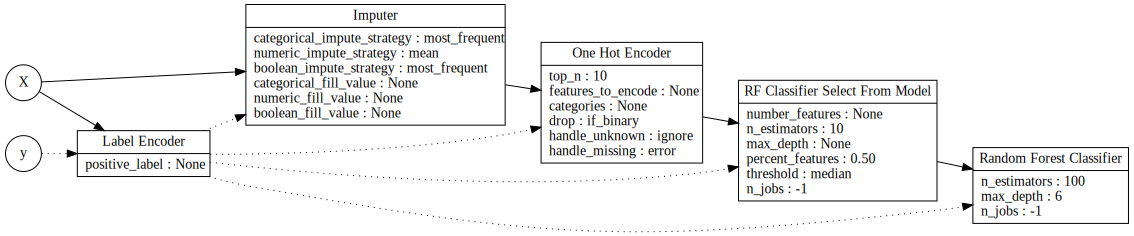

In [106]:
best_pipeline.graph()

In [107]:
best_pipeline.describe()


***********************************************************************************************************
* Random Forest Classifier w/ Label Encoder + Imputer + One Hot Encoder + RF Classifier Select From Model *
***********************************************************************************************************

Problem Type: binary
Model Family: Random Forest
Number of features: 322

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
4. RF Classifier Select From Model
	 * number_features : None
	 * n_estimators : 10
	 * max_depth : None
	 * percent_features : 0.5
	 * threshold : 

In [119]:
best_pipeline.fit(X_train, y_train)
y_prob = best_pipeline.predict_proba(X_test)[1].values
y_prob

array([0.58754755, 0.70197202, 0.53342249, 0.64939401, 0.58360784,
       0.64201835, 0.70655455, 0.68288057, 0.51856998, 0.60828277,
       0.62555723, 0.55554323, 0.45836173, 0.57789471, 0.51057621,
       0.56772736, 0.64588232, 0.47582432, 0.69667578, 0.56354918,
       0.57659881, 0.62573333, 0.30161237, 0.72138306, 0.66931295,
       0.61228308, 0.66107031, 0.62610849, 0.55288368, 0.46589584,
       0.62216442, 0.55235988, 0.55327679, 0.46392025, 0.57781122,
       0.54513844, 0.44924335, 0.69930816, 0.69175777, 0.54570627,
       0.66976439, 0.58045237, 0.60273027, 0.65608238, 0.65541723,
       0.47775936, 0.49371624, 0.54509631, 0.61039961, 0.56931746,
       0.47603054, 0.69788161, 0.57734787, 0.48835983, 0.53687627,
       0.4319363 , 0.54260579, 0.61751779, 0.55631413, 0.53558318,
       0.69299302, 0.7309326 , 0.57148729, 0.32630961, 0.53421509,
       0.36593134, 0.55813694, 0.6651764 , 0.65204751, 0.6545101 ,
       0.59753898, 0.70723364, 0.43648917, 0.51795219, 0.53178

In [120]:
def calibration_loss(y_true, y_prob, reducer="sum", nbins=10, normalize=True,
                     sample_weight=None, pos_label=None):
    if pos_label is None:
        pos_label = y_true.max()
    y_true = np.array(y_true == pos_label, int)
    step_size = 1 / float(nbins)
    loss = 0.
    count = 0.
    for x in np.arange(0, 1, step_size):
        bin_center = x + step_size / 2
        in_range = (x <= y_prob) & (y_prob < x + step_size)
        if sample_weight is None:
            delta_count = in_range.sum()
            avg_pred_true = (in_range * y_true).sum() / float(delta_count)
        else:
            delta_count = (in_range * sample_weight).sum()
            avg_pred_true = ((in_range * y_true * sample_weight).sum()
                             / float(delta_count))
        count += delta_count
        if reducer == "max":
            loss = max(loss, abs(avg_pred_true - bin_center))
        elif reducer == "sum":
            delta_loss = abs(avg_pred_true - bin_center) * delta_count
            if not np.isnan(delta_loss):
                loss += delta_loss
        else:
            raise ValueError("reducer is neither 'sum' nor 'max'")
    if reducer == "sum" and normalize:
        loss /= count
    return loss

In [300]:
from sklearn.metrics import log_loss, brier_score_loss, accuracy_score

print('Log loss: ', log_loss(y_test, y_prob))
print('Brier score: ', brier_score_loss(y_test, y_prob))
print("Calibration error: ", calibration_loss(y_test, y_prob))

y_pred = np.where(y_prob > 0.5, 1, 0)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Log loss:  0.6522556362575213
Brier score:  0.23022282442818984
Calibration error:  0.03282967032967026
Accuracy:  0.6277472527472527


C:\Users\eugen\AppData\Local\Temp\ipykernel_40100\3162594792.py:14: RuntimeWarning:

invalid value encountered in divide



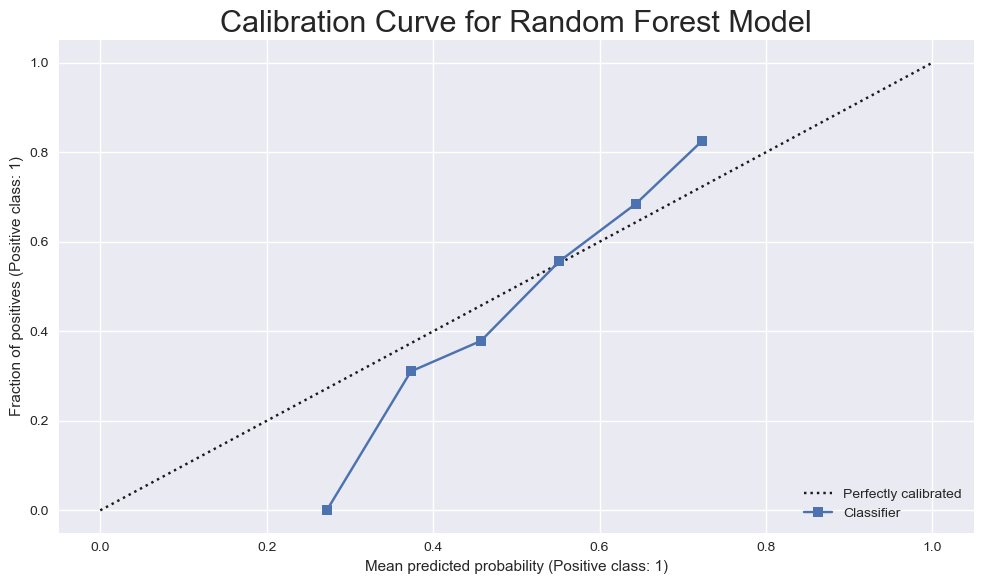

In [373]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import calibration_curve, CalibrationDisplay

plt.style.use("seaborn-v0_8")
fig = plt.figure(figsize=(10, 6))
ax_calibration_curve = fig.add_subplot()

display = CalibrationDisplay.from_predictions(
    y_test, 
    y_prob,
    n_bins=10,
    ax=ax_calibration_curve,
)

ax_calibration_curve.set_title("Calibration Curve for Random Forest Model", fontsize=22)
plt.tight_layout()
plt.show()

## Simulating bets

In [123]:
X_test

,BOUT_WEIGHT_CLASS,BOUT_IS_TITLE_BOUT,RED_f_TOTAL_TIME_MINUTES_CUMULATIVE,RED_f_KNOCKDOWNS_CUMULATIVE,RED_f_TOTAL_STRIKES_LANDED_CUMULATIVE,RED_f_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE,RED_f_TAKEDOWNS_LANDED_CUMULATIVE,RED_f_TAKEDOWNS_ATTEMPTED_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_CUMULATIVE,RED_f_REVERSALS_CUMULATIVE,RED_f_CONTROL_TIME_MINUTES_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE,RED_f_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE,RED_o_KNOCKDOWNS_CUMULATIVE,RED_o_TOTAL_STRIKES_LANDED_CUMULATIVE,RED_o_TOTAL_STRIKES_ATTEMPTED_CUMULATIVE,RED_o_TAKEDOWNS_LANDED_CUMULATIVE,RED_o_TAKEDOWNS_ATTEMPTED_CUMULATIVE,RED_o_SUBMISSION_ATTEMPTS_CUMULATIVE,RED_o_REVERSALS_CUMULATIVE,RED_o_CONTROL_TIME_MINUTES_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_HEAD_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_BODY_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_BODY_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_LEG_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_LEG_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_DISTANCE_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_CLINCH_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_GROUND_LANDED_CUMULATIVE,RED_o_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED_CUMULATIVE,RED_f_TITLE_BOUTS_FOUGHT,RED_f_WINS_TITLE_BOUTS,RED_f_FIVE_ROUND_BOUTS_FOUGHT,RED_f_WINS_FIVE_ROUND_BOUTS,RED_f_WINS_CUMULATIVE,RED_f_LOSSES_CUMULATIVE,RED_f_DRAWS_CUMULATIVE,RED_f_NO_CONTESTS_CUMULATIVE,RED_f_TOTAL_BOUTS_FOUGHT,RED_f_WINS_BY_KO/TKO_CUMULATIVE,RED_f_WINS_BY_SUBMISSION_CUMULATIVE,RED_f_WINS_BY_DECISION_CUMULATIVE,RED_f_WINS_FIRST_ROUND_FINISH_CUMULATIVE,RED_f_LOSSES_BY_KO/TKO_CUMULATIVE,RED_f_LOSSES_BY_SUBMISSION_CUMULATIVE,RED_f_LOSSES_BY_DECISION_CUMULATIVE,RED_f_KNOCKDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE,RED_f_KNOCKDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE,RED_f_KNOCKDOWNS_LANDED/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,RED_f_KNOCKDOWNS_LANDED/ABSORBED_DIFF_CUMULATIVE,RED_f_TOTAL_STRIKES_ACCURACY_PROPORTION_CUMULATIVE,RED_f_TOTAL_STRIKES_DEFENSE_PROPORTION_CUMULATIVE,RED_f_TOTAL_STRIKES_ACCURACY/DEFENSE_MULT_CUMULATIVE,RED_f_TOTAL_STRIKES_LANDED_PER_MINUTE_CUMULATIVE,RED_f_TOTAL_STRIKES_ABSORBED_PER_MINUTE_CUMULATIVE,RED_f_TOTAL_STRIKES_LANDED/ABSORBED_PER_MINUTE_DIFF_CUMULATIVE,RED_f_TOTAL_STRIKES_LANDED/ABSORBED_DIFF_CUMULATIVE,RED_f_TAKEDOWNS_ACCURACY_PROPORTION_CUMULATIVE,RED_f_TAKEDOWNS_DEFENSE_PROPORTION_CUMULATIVE,RED_f_TAKEDOWNS_ACCURACY/DEFENSE_MULT_CUMULATIVE,RED_f_TAKEDOWNS_LANDED_PER_15_MINUTES_CUMULATIVE,RED_f_TAKEDOWNS_ABSORBED_PER_15_MINUTES_CUMULATIVE,RED_f_TAKEDOWNS_LANDED/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,RED_f_TAKEDOWNS_LANDED/ABSORBED_DIFF_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_ACCURACY_PROPORTION_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_DEFENSE_PROPORTION_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_ACCURACY/DEFENSE_MULT_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_PER_15_MINUTES_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS_ABSORBED_PER_15_MINUTES_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS/ABSORBED_PER_15_MINUTES_DIFF_CUMULATIVE,RED_f_SUBMISSION_ATTEMPTS/ABSORBED_DIFF_CUMULATIVE,RED_f_REVERSALS_ACCURACY_PROPORTION_CUMULATIVE,RED_f_REVERSALS_DEFENSE_PROPORTION_CUMULATIVE,RED_f_REVERSALS_ACCURACY/DEFENSE

In [124]:
df.iloc[6173:]

,BOUT_ID,EVENT_ID,EVENT_NAME,DATE,LOCATION,RED_FIGHTER_ID,BLUE_FIGHTER_ID,RED_FIGHTER_NAME,BLUE_FIGHTER_NAME,RED_OUTCOME,BLUE_OUTCOME,BOUT_TYPE,OUTCOME_METHOD,OUTCOME_METHOD_DETAILS,END_ROUND,END_ROUND_TIME_MINUTES,BOUT_TIME_FORMAT,TOTAL_TIME_MINUTES,RED_KNOCKDOWNS,BLUE_KNOCKDOWNS,RED_TOTAL_STRIKES_LANDED,RED_TOTAL_STRIKES_ATTEMPTED,BLUE_TOTAL_STRIKES_LANDED,BLUE_TOTAL_STRIKES_ATTEMPTED,RED_TAKEDOWNS_LANDED,RED_TAKEDOWNS_ATTEMPTED,BLUE_TAKEDOWNS_LANDED,BLUE_TAKEDOWNS_ATTEMPTED,RED_SUBMISSION_ATTEMPTS,BLUE_SUBMISSION_ATTEMPTS,RED_REVERSALS,BLUE_REVERSALS,RED_CONTROL_TIME_MINUTES,BLUE_CONTROL_TIME_MINUTES,RED_SIGNIFICANT_STRIKES_LANDED,RED_SIGNIFICANT_STRIKES_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_LANDED,BLUE_SIGNIFICANT_STRIKES_ATTEMPTED,RED_SIGNIFICANT_STRIKES_HEAD_LANDED,RED_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_HEAD_LANDED,BLUE_SIGNIFICANT_STRIKES_HEAD_ATTEMPTED,RED_SIGNIFICANT_STRIKES_BODY_LANDED,RED_SIGNIFICANT_STRIKES_BODY_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_BODY_LANDED,BLUE_SIGNIFICANT_STRIKES_BODY_ATTEMPTED,RED_SIGNIFICANT_STRIKES_LEG_LANDED,RED_SIGNIFICANT_STRIKES_LEG_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_LEG_LANDED,BLUE_SIGNIFICANT_STRIKES_LEG_ATTEMPTED,RED_SIGNIFICANT_STRIKES_DISTANCE_LANDED,RED_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_DISTANCE_LANDED,BLUE_SIGNIFICANT_STRIKES_DISTANCE_ATTEMPTED,RED_SIGNIFICANT_STRIKES_CLINCH_LANDED,RED_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_CLINCH_LANDED,BLUE_SIGNIFICANT_STRIKES_CLINCH_ATTEMPTED,RED_SIGNIFICANT_STRIKES_GROUND_LANDED,RED_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED,BLUE_SIGNIFICANT_STRIKES_GROUND_LANDED,BLUE_SIGNIFICANT_STRIKES_GROUND_ATTEMPTED,RED_HEIGHT_INCHES,RED_REACH_INCHES,RED_FIGHTING_STANCE,RED_DATE_OF_BIRTH,BLUE_HEIGHT_INCHES,BLUE_REACH_INCHES,BLUE_FIGHTING_STANCE,BLUE_DATE_OF_BIRTH
6173,d988760df61f027c,a1d6b308781aa2f5,UFC Fight Night: Gane vs. Volkov,2021-06-26,"Las Vegas, Nevada, USA",6370c1c1e12723d5,f9d0cae37dabfafc,Marcin Prachnio,Ike Villanueva,W,L,Light Heavyweight Bout,KO/TKO,Kick to Body At Distance,2,0.933333,3 Rnd (5-5-5),5.933333,1.0,0.0,60.0,93.0,34.0,79.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.083333,59.0,92.0,34.0,79.0,23.0,52.0,29.0,73.0,15.0,19.0,4.0,4.0,21.0,21.0,1.0,2.0,55.0,86.0,27.0,63.0,4.0,6.0,4.0,9.0,0.0,0.0,3.0,7.0,75.0,74.0,Orthodox,1988-07-14,73.0,73.0,Orthodox,1984-04-04
6174,81de3929330076d2,a1d6b308781aa2f5,UFC Fight Night: Gane vs. Volkov,2021-06-26,"Las Vegas, Nevada, USA",d317a5e2b3f88c5f,d66a46de8d705353,Warlley Alves,Jeremiah Wells,L,W,Welterweight Bout,KO/TKO,Punch to Head At Distance,2,0.500000,3 Rnd (5-5-5),5.500000,0.0,1.0,15.0,17.0,29.0,62.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,0.366667,3.533333,15.0,17.0,21.0,52.0,1.0,2.0,17.0,48.0,7.0,7.0,4.0,4.0,7.0,8.0,0.0,0.0,10.0,12.0,12.0,36.0,2.0,2.0,0.0,0.0,3.0,3.0,9.0,16.0,71.0,72.0,Orthodox,1991-01-04,69.0,74.0,Switch,1986-10-30
6175,086c2a0cae0835c4,a1d6b308781aa2f5,UFC Fight Night: Gane vs. Volkov,2021-06-26,"Las Vegas, Nevada, USA",01afe0916a40c7c5,e51fcd9cd84c0b93,Shavkat Rakhmonov,Michel Prazeres,W,L,Welterweight Bout,Submission,Rear Naked Choke,2,2.166667,3 Rnd (5-5-5),7.166667,0.0,0.0,64.0,81.0,32.0,40.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,3.416667,0.966667,21.0,35.0,6.0,14.0,15.0,26.0,1.0,6.0,6.0,8.0,0.0,2.0,0.0,1.0,5.0,6.0,10.0,20.0,6.0,14.0,4.0,4.0,0.0,0.0,7.0,11.0,0.0,0.0,73.0,77.0,Orthodox,1994-10-23,66.0,67.0,Orthodox,1981-07-25
6176,85099c6378ff87c5,a1d6b308781aa2f5,UFC Fight Night: Gane vs. Volkov,2021-06-26,"Las Vegas, Nevada, USA",8667caa0451d245b,687c15b2eddfaa63,Kennedy Nzechukwu,Danilo Marques,W,L,Light Heavyweight Bout,KO/TKO,Punches to Head At Distance,3,0.333333,3 Rnd (5-5-5),10.333333,0.0,0.0,31.0,80.0,34.0,60.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0,0.0,0.000000,7.700000,31.0,80.0,10.0,18.0,28.0,76.0,6.0,13.0,3.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,31.0,80.0,10.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,83.0,Southpaw,1992-06-13,78.0,77.0,Orthodox,1985-12-26
6177,4341ebb5a56e6943,a1d6b308781aa2f5,UFC Fight Night: Gane vs

In [125]:
import requests
import json
from concurrent.futures import ThreadPoolExecutor

event_pks = [4738, 4751, 4744, 4671, 4702, 4634, 4696, 4668, 4666, 4654, 
             4643, 4627, 4615, 4594, 4592, 4579, 4580, 4556, 4501, 4483, 
             4486, 4450, 4469, 4460, 4438, 4441, 4382, 4426, 4336, 4335, 
             4334, 4333, 4332, 4331, 4330, 3934, 4318, 4257, 4279, 4051, 
             4032, 4047, 4048, 4040, 3964, 4007, 3988, 3980, 3886, 3965, 
             3972, 3912, 3899, 3890, 3856, 3833, 3877, 3869, 3852, 3836, 
             3806, 3799, 3809, 3815, 3792, 3791, 3781, 3773, 3763, 3762, 
             3738, 3726, 3747, 3727, 3728, 3717, 3681, 3713, 3688, 3678, 
             3663, 3637, 3640, 3604, 3633, 3634, 3607, 3609, 3599, 3586, 
             3585, 3568]

def get_event_odds(event_pk):
    url = "https://api.fightinsider.io/gql"

    payload = json.dumps(
        {
            "query": "query EventOddsQuery(\n  $eventPk: Int!\n) {\n  sportsbooks: allSportsbooks(hasOdds: true) {\n    ...EventTabPanelOdds_sportsbooks\n  }\n  eventOfferTable(pk: $eventPk) {\n    slug\n    ...EventTabPanelOdds_eventOfferTable\n    id\n  }\n}\n\nfragment EventOfferTable_eventOfferTable on EventOfferTableNode {\n  name\n  pk\n  fightOffers {\n    edges {\n      node {\n        id\n        fighter1 {\n          firstName\n          lastName\n          slug\n          id\n        }\n        fighter2 {\n          firstName\n          lastName\n          slug\n          id\n        }\n        bestOdds1\n        bestOdds2\n        slug\n        propCount\n        isCancelled\n        straightOffers {\n          edges {\n            node {\n              sportsbook {\n                id\n                shortName\n                slug\n              }\n              outcome1 {\n                id\n                odds\n                ...OddsWithArrowButton_outcome\n              }\n              outcome2 {\n                id\n                odds\n                ...OddsWithArrowButton_outcome\n              }\n              id\n            }\n          }\n        }\n      }\n    }\n  }\n}\n\nfragment EventOfferTable_sportsbooks on SportsbookNodeConnection {\n  edges {\n    node {\n      id\n      shortName\n      slug\n    }\n  }\n}\n\nfragment EventTabPanelOdds_eventOfferTable on EventOfferTableNode {\n  fightOffers {\n    edges {\n      node {\n        id\n        isCancelled\n      }\n    }\n  }\n  ...EventOfferTable_eventOfferTable\n}\n\nfragment EventTabPanelOdds_sportsbooks on SportsbookNodeConnection {\n  ...EventOfferTable_sportsbooks\n}\n\nfragment OddsWithArrowButton_outcome on OutcomeNode {\n  id\n  ...OddsWithArrow_outcome\n}\n\nfragment OddsWithArrow_outcome on OutcomeNode {\n  odds\n  oddsPrev\n}\n",
            "variables": {"eventPk": event_pk},
        }
    )

    headers = {
        "authority": "api.fightinsider.io",
        "accept": "*/*",
        "accept-language": "en-US,en;q=0.9",
        "content-type": "application/json",
        "origin": "https://fightodds.io",
        "referer": "https://fightodds.io/",
        # "sec-ch-ua": '"Google Chrome";v="113", "Chromium";v="113", "Not-A.Brand";v="24"',
        # "sec-ch-ua-mobile": "?0",
        # "sec-ch-ua-platform": '"Windows"',
        # "sec-fetch-dest": "empty",
        # "sec-fetch-mode": "cors",
        # "sec-fetch-site": "cross-site",
        # "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36",
        # "Cookie": "csrftoken=FTWQ4jk40DvAy0L1zZfoaYJZoxnEQbE9WcAZ7IztIZphp43Li7Gd16dooCmczzHy",
    }

    response = requests.request("POST", url, headers=headers, data=payload)
    response.raise_for_status()
    response_data = response.json()
    bout_odds = [x["node"] for x in response_data["data"]["eventOfferTable"]["fightOffers"]["edges"]]

    return bout_odds

all_bout_odds = []
with ThreadPoolExecutor(max_workers=10) as executor:
    for result in executor.map(get_event_odds, event_pks):
        all_bout_odds.extend(result)

def process_responses(bout_odds):  
    R_Name = bout_odds["fighter1"]["firstName"] + " " + bout_odds["fighter1"]["lastName"]
    B_Name = bout_odds["fighter2"]["firstName"] + " " + bout_odds["fighter2"]["lastName"]
    info = [R_Name, B_Name]

    good_bookies = ["BetOnline", "Bovada", "Pinnacle", "Jazz", "Cloudbet", "SIA", "Unibet", "DraftKings", "FanDuel"]
    for bookie in good_bookies:
        for offer in bout_odds["straightOffers"]["edges"]:
            if offer["node"]["sportsbook"]["shortName"] == bookie:
                if offer["node"]["outcome1"]:
                    info.append(offer["node"]["outcome1"]["odds"])
                else:
                    info.append(np.nan)
                
                if offer["node"]["outcome2"]:
                    info.append(offer["node"]["outcome2"]["odds"])
                else:
                    info.append(np.nan)
                break
        else:
            info.append(np.nan)
            info.append(np.nan)
    
    return info

res = []
for bout_odds in reversed(all_bout_odds):
    if bout_odds["isCancelled"]:
        continue
    res.append(process_responses(bout_odds))

columns = ["R_Name", "B_Name", 
           "R_Odds_BetOnline", "B_Odds_BetOnline",
           "R_Odds_Bovada", "B_Odds_Bovada",
           "R_Odds_Pinnacle", "B_Odds_Pinnacle",
           "R_Odds_Jazz", "B_Odds_Jazz",
           "R_Odds_Cloudbet", "B_Odds_Cloudbet",
           "R_Odds_SIA", "B_Odds_SIA",
           "R_Odds_Unibet", "B_Odds_Unibet",
           "R_Odds_DraftKings", "B_Odds_DraftKings",
           "R_Odds_FanDuel", "B_Odds_FanDuel"]

odds = pd.DataFrame(res, columns=columns)
odds

,R_Name,B_Name,R_Odds_BetOnline,B_Odds_BetOnline,R_Odds_Bovada,B_Odds_Bovada,R_Odds_Pinnacle,B_Odds_Pinnacle,R_Odds_Jazz,B_Odds_Jazz,R_Odds_Cloudbet,B_Odds_Cloudbet,R_Odds_SIA,B_Odds_SIA,R_Odds_Unibet,B_Odds_Unibet,R_Odds_DraftKings,B_Odds_DraftKings,R_Odds_FanDuel,B_Odds_FanDuel
0,Yancy Medeiros,Damir Hadzovic,123,-143,125.0,-150.0,121.0,-139.0,123.0,-138.0,126.0,-145.0,110.0,-135.0,120.0,-150.0,295,-455,350.0,-550.0
1,Charles Rosa,Justin Jaynes,-160,140,-165.0,135.0,-164.0,141.0,-161.0,146.0,-1020.0,488.0,-165.0,130.0,-177.0,140.0,-715,425,-550.0,350.0
2,Julia Avila,Julija Stoliarenko,-350,275,-360.0,270.0,-430.0,278.0,-334.0,289.0,-350.0,292.0,-385.0,270.0,-375.0,275.0,-835,500,-1000.0,580.0
3,Marcin Prachnio,Ike Villanueva,-224,189,-220.0,175.0,-235.0,180.0,-218.0,193.0,-234.0,187.0,-230.0,170.0,-225.0,180.0,-225,180,-220.0,184.0
4,Warlley Alves,Jeremiah Wells,-240,205,-230.0,185.0,-273.0,204.0,-240.0,210.0,-260.0,208.0,-260.0,190.0,-240.0,187.0,-182,130,-235.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,Tafon Nchukwi,AJ Dobson,-137,117,-140.0,115.0,-154.0,115.0,-143.0,121.0,176.0,-254.0,-150.0,115.0,-143.0,115.0,1500,-4000,1180.0,-2400.0
1115,Iasmin Lucindo,Polyana Viana,-200,170,-200.0,165.0,-209.0,150.0,-190.0,160.0,-190.0,173.0,-225.0,160.0,-200.0,160.0,-620,400,-280.0,210.0
1116,Khalil Rountree,Christopher Daukaus,-156,136,-195.0,165.0,-165.0,145.0,-165.0,139.0,-161.0,147.0,-175.0,135.0,-190.0,150.0,-170,142,-215.0,164.0
1117,Cub Swanson,Hakeem Dawodu,250,-300,250.0,-300.0,245.0,-292.0,244.0,-296.0,719.0,-1562.0,265.0,-380.0,200.0,-265.0,400,-620,720.0,-1300.0


In [141]:
def convert_american_to_fractional(american_odds):
    if american_odds > 0:
        return american_odds / 100
    else:
        return 100 / -american_odds

In [301]:
df2 = df[["BOUT_ID", "EVENT_ID", "DATE"]].tail(1119)
df2["RED_ODDS"] = odds["R_Odds_BetOnline"].values
df2["RED_ODDS"] = df2["RED_ODDS"].apply(lambda x: convert_american_to_fractional(x))
df2["BLUE_ODDS"] = odds["B_Odds_BetOnline"].values
df2["BLUE_ODDS"] = df2["BLUE_ODDS"].apply(lambda x: convert_american_to_fractional(x))
df2 = df2.loc[X_test.index]
df2["RED_PREDICTED_PROBABILITIES"] = y_prob
df2["TARGET"] = y_test
df2

,BOUT_ID,EVENT_ID,DATE,RED_ODDS,BLUE_ODDS,RED_PREDICTED_PROBABILITIES,TARGET
6173,d988760df61f027c,a1d6b308781aa2f5,2021-06-26,0.446429,1.890000,0.587548,1.0
6175,086c2a0cae0835c4,a1d6b308781aa2f5,2021-06-26,2.800000,0.281690,0.701972,1.0
6176,85099c6378ff87c5,a1d6b308781aa2f5,2021-06-26,1.090000,0.775194,0.533422,1.0
6177,4341ebb5a56e6943,a1d6b308781aa2f5,2021-06-26,0.429185,1.980000,0.649394,1.0
6178,c9283da5f4d7aaf4,a1d6b308781aa2f5,2021-06-26,1.180000,0.724638,0.583608,1.0
...,...,...,...,...,...,...,...
7283,9a9479663bedf8b4,d2fa318f34d0aadc,2023-08-12,0.333333,2.500000,0.663795,1.0
7284,560a971c6ab8b854,d2fa318f34d0aadc,2023-08-12,0.729927,1.170000,0.396780,1.0
7286,c57a4810c932b296,d2fa318f34d0aadc,2023-08-12,0.641026,1.360000,0.499258,1.0
7287,1b1fd32485861655,d2fa318f34d0aadc,2023-08-12,2.500000,0.333333,0.532595,1.0


In [302]:
df2.loc[df2.isnull().any(axis=1), :]

,BOUT_ID,EVENT_ID,DATE,RED_ODDS,BLUE_ODDS,RED_PREDICTED_PROBABILITIES,TARGET


In [369]:
def simulate_kelly(df: pd.DataFrame, fraction: float) -> pd.DataFrame:
    bankroll = np.zeros((len(df,)))
    current_bankroll = 1000

    for index, row in enumerate(df.itertuples()):
        if current_bankroll == 0:
            break
        p = row.RED_PREDICTED_PROBABILITIES
        q = 1 - p
        b = row.RED_ODDS
        kelly = fraction * (p - (q / b))

        if kelly > 0:
            wager = current_bankroll * kelly
            if wager < 1.0 and current_bankroll >= 1.0:
                wager = 1.0
            elif current_bankroll < 1.0:
                break

            if row.TARGET == 1:
                current_bankroll += wager * b
            else:
                current_bankroll -= wager
        else:
            p = 1 - row.RED_PREDICTED_PROBABILITIES
            q = 1 - p
            b = row.BLUE_ODDS
            kelly = fraction * (p - (q / b))
            assert kelly <= 1

            if kelly > 0:
                wager = current_bankroll * kelly
                if wager < 1.0 and current_bankroll >= 1.0:
                    wager = 1.0

                if row.TARGET == 0:
                    current_bankroll += wager * b
                else:
                    current_bankroll -= wager
        
        bankroll[index] = current_bankroll
    new_df = df.copy()
    new_df[f"BANKROLL_KELLY_{fraction}"] = bankroll
    return new_df

In [374]:
df3 = simulate_kelly(df2, 0.1)
df3

,BOUT_ID,EVENT_ID,DATE,RED_ODDS,BLUE_ODDS,RED_PREDICTED_PROBABILITIES,TARGET,BANKROLL_KELLY_0.1
6173,d988760df61f027c,a1d6b308781aa2f5,2021-06-26,0.446429,1.890000,0.587548,1.0,989.841927
6175,086c2a0cae0835c4,a1d6b308781aa2f5,2021-06-26,2.800000,0.281690,0.701972,1.0,1154.897441
6176,85099c6378ff87c5,a1d6b308781aa2f5,2021-06-26,1.090000,0.775194,0.533422,1.0,1168.161785
6177,4341ebb5a56e6943,a1d6b308781aa2f5,2021-06-26,0.429185,1.980000,0.649394,1.0,1165.518327
6178,c9283da5f4d7aaf4,a1d6b308781aa2f5,2021-06-26,1.180000,0.724638,0.583608,1.0,1197.251322
...,...,...,...,...,...,...,...,...
7283,9a9479663bedf8b4,d2fa318f34d0aadc,2023-08-12,0.333333,2.500000,0.663795,1.0,502302.128629
7284,560a971c6ab8b854,d2fa318f34d0aadc,2023-08-12,0.729927,1.170000,0.396780,1.0,489036.706725
7286,c57a4810c932b296,d2fa318f34d0aadc,2023-08-12,0.641026,1.360000,0.499258,1.0,482501.155249
7287,1b1fd32485861655,d2fa318f34d0aadc,2023-08-12,2.500000,0.333333,0.532595,1.0,524193.159181


<AxesSubplot: ylabel='BANKROLL_KELLY_0.1'>

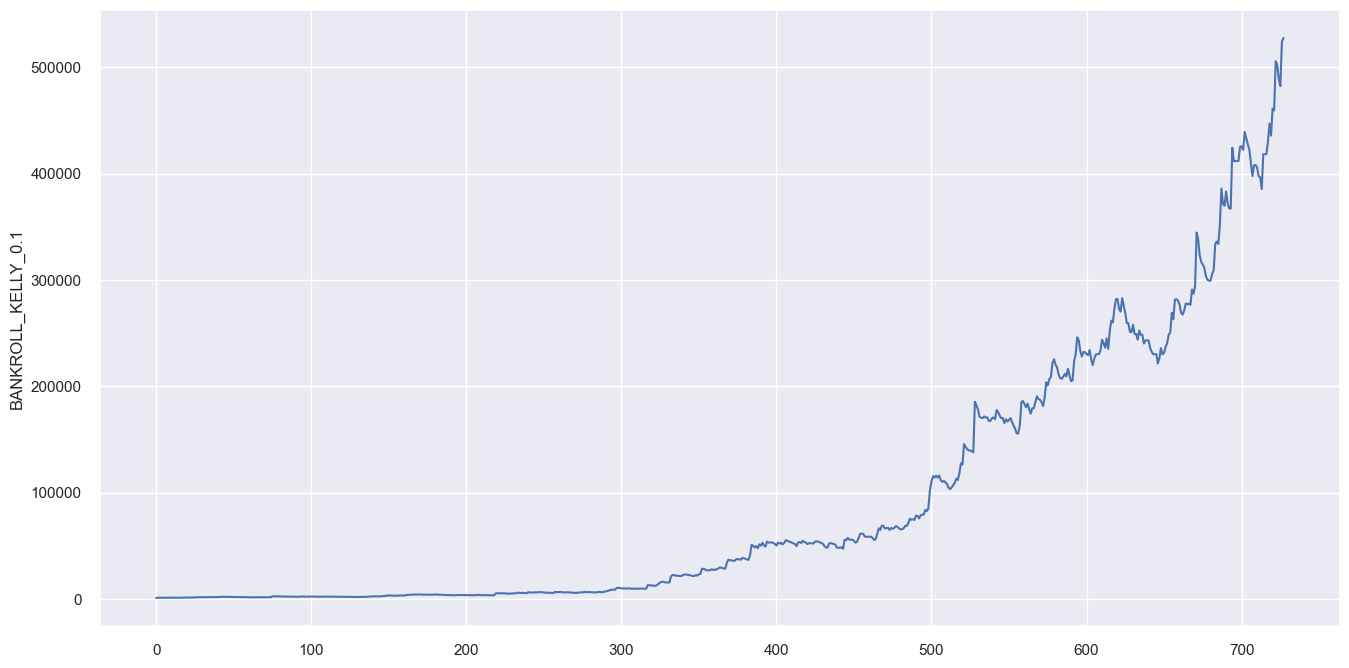

In [375]:
import seaborn as sns

# df3["LOG_10(BANKROLL_KELLY_0.25)"] = np.log10(df3["BANKROLL_KELLY_0.25"])

sns.set(rc={'figure.figsize':(16, 8)})
sns.lineplot(data=df3, x=range(len(df3)), y="BANKROLL_KELLY_0.1")

In [250]:
df3["BANKROLL_KELLY_0.5"].describe().to_frame()

,BANKROLL_KELLY_0.5
count,7.280000e+02
mean,1.390556e+10
std,3.924844e+10
min,9.492096e+02
25%,3.786870e+04
50%,2.282819e+07
75%,8.114475e+09
max,3.367811e+11


In [341]:
df4 = df2.loc[df2["DATE"] >= pd.to_datetime("2023-01-01")]
df4

,BOUT_ID,EVENT_ID,DATE,RED_ODDS,BLUE_ODDS,RED_PREDICTED_PROBABILITIES,TARGET
6945,b6723b9c6ff4d594,2e2cdb6e9eb84bb9,2023-01-14,2.850000,0.277778,0.657053,1.0
6947,c9144a294c73b06f,2e2cdb6e9eb84bb9,2023-01-14,0.317460,2.650000,0.593137,1.0
6951,a4c7d59d340794c0,2e2cdb6e9eb84bb9,2023-01-14,0.111111,6.000000,0.723757,1.0
6953,d4420be78065de03,2e2cdb6e9eb84bb9,2023-01-14,0.699301,1.230000,0.622224,0.0
6954,c88a7dbe7717d2da,2e2cdb6e9eb84bb9,2023-01-14,0.740741,1.150000,0.559209,1.0
...,...,...,...,...,...,...,...
7283,9a9479663bedf8b4,d2fa318f34d0aadc,2023-08-12,0.333333,2.500000,0.663795,1.0
7284,560a971c6ab8b854,d2fa318f34d0aadc,2023-08-12,0.729927,1.170000,0.396780,1.0
7286,c57a4810c932b296,d2fa318f34d0aadc,2023-08-12,0.641026,1.360000,0.499258,1.0
7287,1b1fd32485861655,d2fa318f34d0aadc,2023-08-12,2.500000,0.333333,0.532595,1.0


In [342]:
df4.loc[df4.isnull().any(axis=1), :]

,BOUT_ID,EVENT_ID,DATE,RED_ODDS,BLUE_ODDS,RED_PREDICTED_PROBABILITIES,TARGET


In [361]:
df5 = simulate_kelly(df4, 0.1)
df5

,BOUT_ID,EVENT_ID,DATE,RED_ODDS,BLUE_ODDS,RED_PREDICTED_PROBABILITIES,TARGET,BANKROLL_KELLY_0.1
6945,b6723b9c6ff4d594,2e2cdb6e9eb84bb9,2023-01-14,2.850000,0.277778,0.657053,1.0,1152.965574
6947,c9144a294c73b06f,2e2cdb6e9eb84bb9,2023-01-14,0.317460,2.650000,0.593137,1.0,1131.861904
6951,a4c7d59d340794c0,2e2cdb6e9eb84bb9,2023-01-14,0.111111,6.000000,0.723757,1.0,1114.248209
6953,d4420be78065de03,2e2cdb6e9eb84bb9,2023-01-14,0.699301,1.230000,0.622224,0.0,1105.110949
6954,c88a7dbe7717d2da,2e2cdb6e9eb84bb9,2023-01-14,0.740741,1.150000,0.559209,1.0,1105.110949
...,...,...,...,...,...,...,...,...
7283,9a9479663bedf8b4,d2fa318f34d0aadc,2023-08-12,0.333333,2.500000,0.663795,1.0,3973.775989
7284,560a971c6ab8b854,d2fa318f34d0aadc,2023-08-12,0.729927,1.170000,0.396780,1.0,3868.831550
7286,c57a4810c932b296,d2fa318f34d0aadc,2023-08-12,0.641026,1.360000,0.499258,1.0,3817.127972
7287,1b1fd32485861655,d2fa318f34d0aadc,2023-08-12,2.500000,0.333333,0.532595,1.0,4146.958715


<AxesSubplot: ylabel='BANKROLL_KELLY_0.1'>

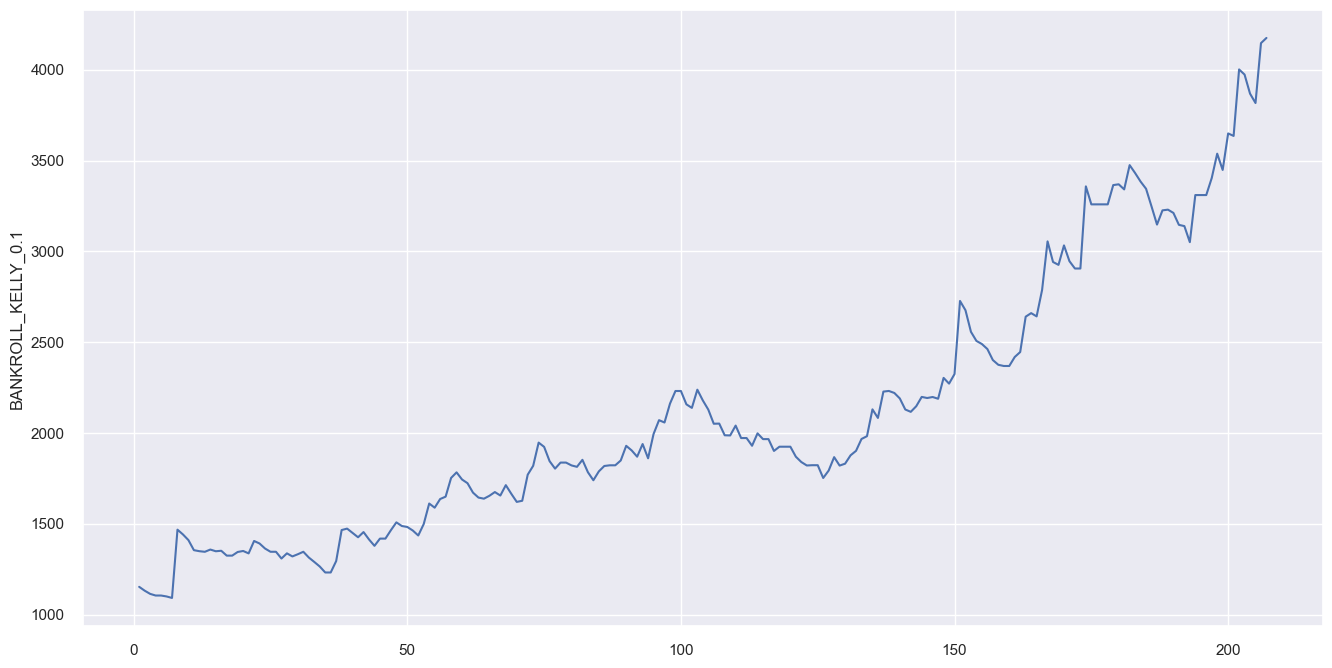

In [362]:
sns.set(rc={'figure.figsize':(16, 8)})
sns.lineplot(data=df5, x=range(1, len(df5) + 1), y="BANKROLL_KELLY_0.1")

In [363]:
df6 = df2.loc[(df2["DATE"] >= pd.to_datetime("2022-07-07")) & (df2["DATE"] <= pd.to_datetime("2023-07-07"))]
df6

,BOUT_ID,EVENT_ID,DATE,RED_ODDS,BLUE_ODDS,RED_PREDICTED_PROBABILITIES,TARGET
6702,fb3f5a65da9f2ac7,31da66df48c0c1a0,2022-07-09,0.854701,0.970874,0.633049,0.0
6703,478bc7d1288e043e,31da66df48c0c1a0,2022-07-09,0.588235,1.450000,0.582698,1.0
6706,04e1ff7aeda2a018,31da66df48c0c1a0,2022-07-09,1.380000,0.632911,0.591898,1.0
6707,a103b30f6898de7e,31da66df48c0c1a0,2022-07-09,1.900000,0.444444,0.475270,0.0
6708,c58b3223b5caa18a,31da66df48c0c1a0,2022-07-09,2.000000,0.425532,0.519317,1.0
...,...,...,...,...,...,...,...
7205,962e74250884e4c1,e9e1acc96536bb4f,2023-07-01,1.770000,0.483092,0.481088,0.0
7207,cd137988da724076,e9e1acc96536bb4f,2023-07-01,2.200000,0.384615,0.617548,0.0
7209,0548a24a9bf8d7a0,e9e1acc96536bb4f,2023-07-01,2.400000,0.357143,0.432455,0.0
7210,4dc5a41f357a7d85,e9e1acc96536bb4f,2023-07-01,0.819672,1.020000,0.580270,0.0


In [370]:
df7 = simulate_kelly(df6, 0.1)
df7

,BOUT_ID,EVENT_ID,DATE,RED_ODDS,BLUE_ODDS,RED_PREDICTED_PROBABILITIES,TARGET,BANKROLL_KELLY_0.1
6702,fb3f5a65da9f2ac7,31da66df48c0c1a0,2022-07-09,0.854701,0.970874,0.633049,0.0,979.628337
6703,478bc7d1288e043e,31da66df48c0c1a0,2022-07-09,0.588235,1.450000,0.582698,1.0,978.115605
6706,04e1ff7aeda2a018,31da66df48c0c1a0,2022-07-09,1.380000,0.632911,0.591898,1.0,1018.092864
6707,a103b30f6898de7e,31da66df48c0c1a0,2022-07-09,1.900000,0.444444,0.475270,0.0,997.822987
6708,c58b3223b5caa18a,31da66df48c0c1a0,2022-07-09,2.000000,0.425532,0.519317,1.0,1053.496762
...,...,...,...,...,...,...,...,...
7205,962e74250884e4c1,e9e1acc96536bb4f,2023-07-01,1.770000,0.483092,0.481088,0.0,15289.656101
7207,cd137988da724076,e9e1acc96536bb4f,2023-07-01,2.200000,0.384615,0.617548,0.0,14611.244978
7209,0548a24a9bf8d7a0,e9e1acc96536bb4f,2023-07-01,2.400000,0.357143,0.432455,0.0,14324.895907
7210,4dc5a41f357a7d85,e9e1acc96536bb4f,2023-07-01,0.819672,1.020000,0.580270,0.0,14227.200281


<AxesSubplot: ylabel='BANKROLL_KELLY_0.1'>

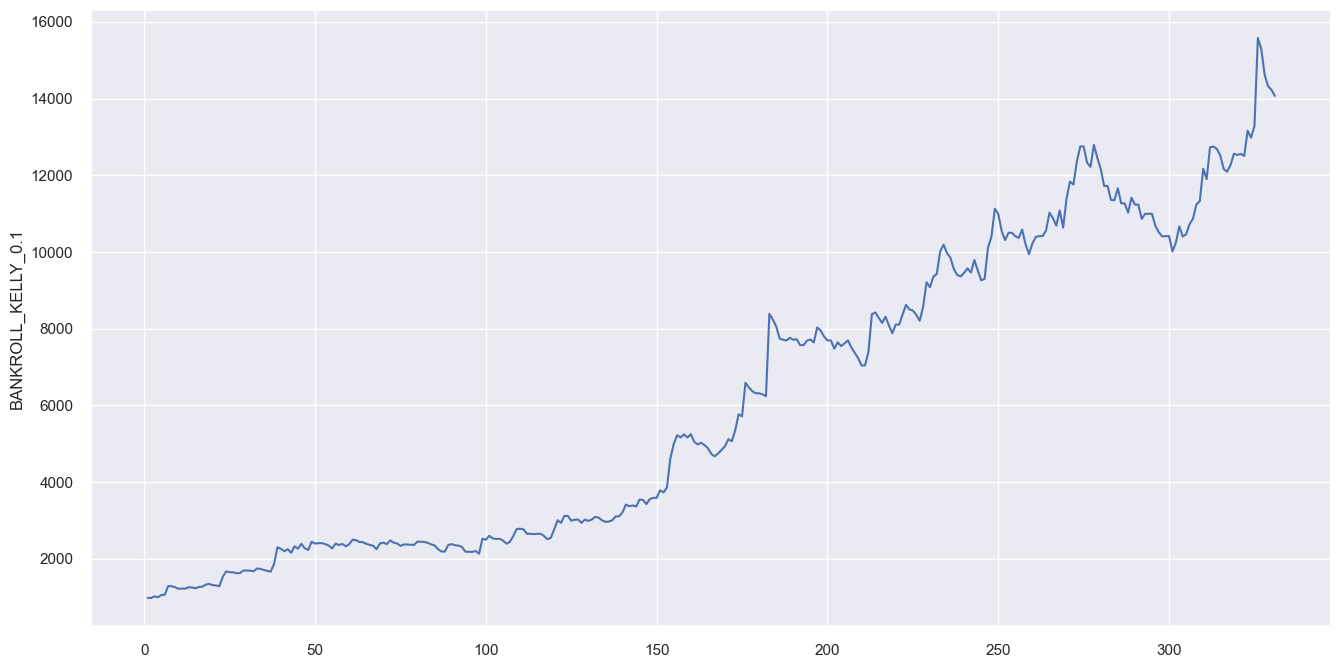

In [371]:
sns.set(rc={'figure.figsize':(16, 8)})
sns.lineplot(data=df7, x=range(1, len(df7) + 1), y="BANKROLL_KELLY_0.1")